In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [25]:

#specify which class's segments you are looking for...
def getSingleVideoSegments(VID, csv_path, cls):
    try:
        lines = open(path_to_CSV,'r').readlines()[2:]
    except Exception as e:
        print(e)
        exit(1)
    frame_st_et_list = []
    for line in lines:
        try:
            l=line.split(",")
            vid_ID = l[1].split('\\\\')[3].replace('"','')[:-5]
            #determine the kind of label:
            lab = l[4].replace('"','')
            lab = lab.strip("{}\n").split(":") #lab[0] is 'OnlyOneDancer?' or 'BalletSteps'
            #print(lab[0])
            cl=0
            onlyOne=0
            if lab[0].lower() == 'OnlyOneDancer?'.lower(): # Check if it's a onlyOne flag
                onlyOne = int(lab[1])
                continue #skip these
            elif int(lab[1])==19: #skip the backwards annotations for now
                continue
            elif lab[0].lower() == 'BalletSteps'.lower():
                cl = int(lab[1]) #otherwise it's a ballet step class label
            
            if(vid_ID == VID): # look for our video of interest:
                #print(l)
                
                if cl == cls: # if it is an extensionDerriereRight segment:
                    print(vid_ID)
                    print("class: ", cl)
                    print("start: ", l[2])
                    print("end: ", l[3])
                    st = float(l[2])
                    et = float(l[3])
                    #calculate the frame numbers for 25 fps video:
                    st_frame = round(st*25)
                    et_frame = round(et*25)
                    segment_fr = [cl,st_frame, et_frame]
                    print(segment_fr)
                    frame_st_et_list.append(segment_fr)
    
        except Exception as e:
            print(e)
    print("frame_st_et_list: ", frame_st_et_list)
    return frame_st_et_list

path_to_CSV = "C:/Users/margauxf/Dropbox/PhD/2023/1-AnnChor1000-Reviewed-CSVsOnly/SWA.csv"
#frame_segments_ls = getSingleVideoSegments("SWA0010",path_to_CSV, 12) # Right
frame_segments_ls = getSingleVideoSegments("SWA0010",path_to_CSV, 13) # Left

SWA0010
class:  13
start:  25.295
end:  25.795
[13, 632, 645]
SWA0010
class:  13
start:  30.027
end:  30.547
[13, 751, 764]
SWA0010
class:  13
start:  78.938
end:  79.458
[13, 1973, 1986]
SWA0010
class:  13
start:  88.087
end:  88.547
[13, 2202, 2214]
frame_st_et_list:  [[13, 632, 645], [13, 751, 764], [13, 1973, 1986], [13, 2202, 2214]]


num_colours 30
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001973_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001974_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001975_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001976_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001977_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001978_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001979_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001980_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001981_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001982_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001983_keypoints.json
C:/Use

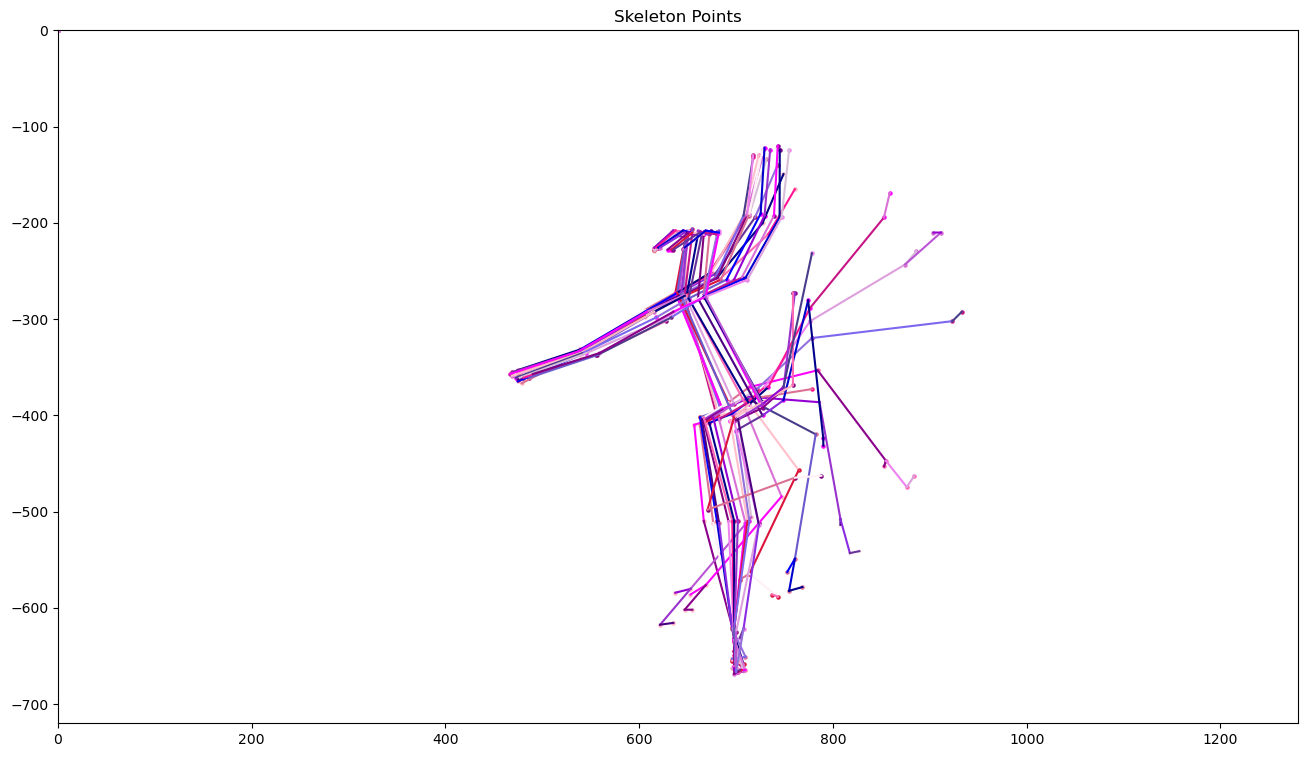

In [26]:
#Get the json files for the segments we have now...

path_to_JSON = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON"

def plot_segment_skeleton_points(start_frame, end_frame, vid_ID):
    bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
    print("num_colours",len(penColor))
    fig, ax = plt.subplots(1, figsize=(16,9))
    ax.set_prop_cycle('color',penColor)
    plt.title('Skeleton Points')
    plt.xlim(0, 1280)
    plt.ylim(-720, 0)
        
    st_file_name = vid_ID +"_"+str(start_frame).rjust(12, '0') +"_keypoints.json"
    # startf = 5   end = 9... 9-5 = 4 for i in range(4+1) -> 0,1,2,3,4
    iter_count = end_frame - start_frame
    for i in range(iter_count+1):
        json_file_num = start_frame + i
        json_file_name = vid_ID +"_"+str(json_file_num).rjust(12, '0') +"_keypoints.json"
        json_file_path = path_to_JSON+"/"+vid_ID+"/"+json_file_name
        print(json_file_path)
        img_json = pd.read_json(json_file_path)
        keypoints = img_json.people[0]['pose_keypoints_2d']
        #print(keypoints)
        x = keypoints[0::3]
        yorig = keypoints[1::3]
        corig = keypoints[2::3]
        y = [-y for y in yorig]
        sc = ax.scatter(x,y, s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])

#plot_segment_skeleton_points(2151, 2165,"SWA0010") # right
plot_segment_skeleton_points(1973, 1986,"SWA0010") # left # Test set - low: 654, 665 #: issue high: 1895, 1910


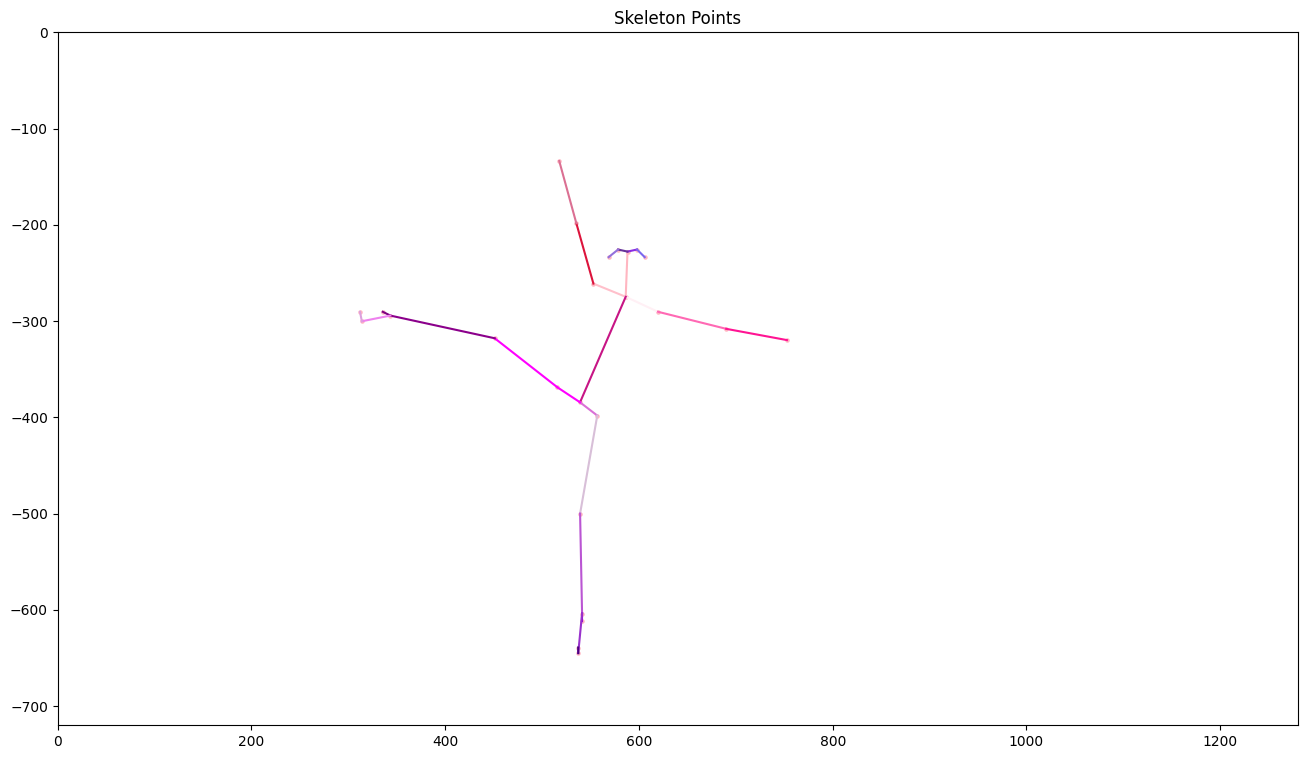

In [24]:
#INITIAL TEST CODE TO VISUALIZE A SINGLE SKELETON
import matplotlib.pyplot as plt
#Plot a single sample frame
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_prop_cycle('color',penColor)
plt.title('Skeleton Points')
plt.xlim(0, 1280)
plt.ylim(-720, 0)


#ToComment
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000002158_keypoints.json" #right
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001981_keypoints.json" #left
sample_json_file_pth = "/Users/margauxbowditch/Dropbox/PhD/Last_Visuals/SWA0010/SWA0010_000000002158_keypoints.json" #Macbook

img_json = pd.read_json(sample_json_file_pth)
keypoints = img_json.people[0]['pose_keypoints_2d']
#print(keypoints)
x = keypoints[0::3]
yorig = keypoints[1::3]
corig = keypoints[2::3]
y = [-y for y in yorig]
sc = ax.scatter(x,y, s=5)
for bone in bones:
    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
        continue
    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])

In [11]:
import math

#Helper method
def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

#Helper method
def getLowestFootCoordIndex(y_arr):
    #find the "lowest" foot coordinate. We'll look at y values 22,23,19,20 (toes) 11,24,21,14 (ankles/heels)
    foot_indices = [11,14,19,20,21,22,23,24]
    max_foot_y = 0
    max_foot_index = 0
    for i in foot_indices:
        #print(f"footindex:{i}: {y_arr[i]}")
        if y_arr[i] > max_foot_y:
            max_foot_y = y_arr[i]
            max_foot_index=i
    #print(f"'lowest' foot y value: {max_foot_y}")
    return max_foot_index

#Helper method
def isLorR(index):
    #RHeel:24 RAnkle:11 RBigToe:22 RSmallToe:23
    #LHeel:21 LAnkle:14 LBigToe:19 LSmallToe:20
    R_arr=[24,11,22,23]
    L_arr=[21,14,19,20]
    toReturn = "None"
    for r in R_arr:
        if index == r:
            toReturn = 'right'
    for l in L_arr:
        if index == l:
            toReturn = 'left'
    #print(toReturn)
    return toReturn

In [10]:
def establish_stave_lines(file_path):
    #print("Stave lines:")
    img_json = pd.read_json(file_path)
    keypoints = img_json.people[0]['pose_keypoints_2d']
    #print(keypoints)
    x_arr = keypoints[0::3]
    y_arr = keypoints[1::3]
    #print("X-coords:",x_arr)
    #print(len(x_arr))
    #print("Y-coords:",y_arr)
    #print(len(y_arr))
    #We know for the start frame for Extensions derriere, the head/eyes are the highest points, feet are the lowest points
    #print(f'X: {keypoints[0]}, {keypoints[1]}')
    # find the top of head line, find the below the feet line:
    #find the distance between the nose and the base of the neck, Coords 0 and 1
    nose_neck_dist = calculate_distance(x_arr[0], y_arr[0],x_arr[1],y_arr[1])
    #print("Nose-Neck-Distance: ", nose_neck_dist )
    nose_tophead_dist = 0.75*nose_neck_dist #we estimate the distance to the top of head to be 3/4 of neck-nose distance.
    toph_line = y_arr[0]-nose_tophead_dist
    #print("toph_line y value: ", toph_line)
    #find the "lowest" foot coordinate. We'll look at y values 22,23,19,20 (toes) 11,24,21,14 (ankles/heels)
    max_foot_index = getLowestFootCoordIndex(y_arr)
    l_or_r = isLorR(max_foot_index)
    # if we are working with the right foot: [24,11,22,23], for the left foot: [21,14,19,20] are relevant.
    bt_heel_dist = 0 # BigToe,Heel,Distance
    if l_or_r == 'right':
        #BigToe: index 22, Heel: index 24
        bt_heel_dist = calculate_distance(x_arr[22],y_arr[22],x_arr[24],y_arr[24])
    elif l_or_r == 'left':
        #BigToe: index 19, Heel: index 21
        bt_heel_dist = calculate_distance(x_arr[19],y_arr[19], x_arr[21], y_arr[21])
    #to establish the line between flat and demi - calculate distance between heel and bigtoe, take vertical halfway between
    feet_line_margin = bt_heel_dist/2    
    
    feet_line = y_arr[max_foot_index]-feet_line_margin # subtract so that it's just above the big_toe.
    
    stave_height = feet_line - toph_line
    #print("height:", stave_height)
    
    waist_line = feet_line - (0.5*stave_height)
    #print(f"Waist_line: {waist_line}")
    shoulder_line = toph_line + (0.25*stave_height)
    #print(f"Shoulder_line: {shoulder_line}")
    knees_line = toph_line +  (0.75*stave_height)
    #print(f"Knees_line: {knees_line}")
    #print([toph_line, feet_line, waist_line, shoulder_line, knees_line])
    return[toph_line, feet_line, waist_line, shoulder_line, knees_line]

In [12]:
def establishSaggitalLines(file_path): #left and right are from the dancer's perspective.
    img_json = pd.read_json(file_path)
    keypoints = img_json.people[0]['pose_keypoints_2d']
    #print(keypoints)
    x_arr = keypoints[0::3]
    y_arr = keypoints[1::3]
    #midline should be x = mid_hip coord - at index 8
    midline = x_arr[8]
    #far left/right should be:length of one leg (left leg) added to the midline on both ends.
    #get values for midhip_lhip_length:
    x1 = x_arr[8]
    y1 = y_arr[8]
    x2 = x_arr[12]
    y2 = y_arr[12]
    midhip_lhip_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lhip_lknee_length:
    x1 = x_arr[12]
    y1 = y_arr[12]
    x2 = x_arr[13]
    y2 = y_arr[13]
    lhip_lknee_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lknee_lankle_length:
    x1 = x_arr[13]
    y1 = y_arr[13]
    x2 = x_arr[14]
    y2 = y_arr[14]
    lknee_lankle_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lankle_lbigtoe_length:
    x1 = x_arr[14]
    y1 = y_arr[14]
    x2 = x_arr[19]
    y2 = y_arr[19]
    lankle_lbigtoe_length = calculate_distance(x1,y1,x2,y2)
    
    overall_leg_length = midhip_lhip_length + lhip_lknee_length + lknee_lankle_length + lankle_lbigtoe_length
    
    left_line = midline + overall_leg_length
    left_mid_line = midline + (overall_leg_length/2)
    right_line = midline - overall_leg_length
    right_mid_line = midline - (overall_leg_length/2)
    sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line]
    
    #print(sag_lines)
    return sag_lines

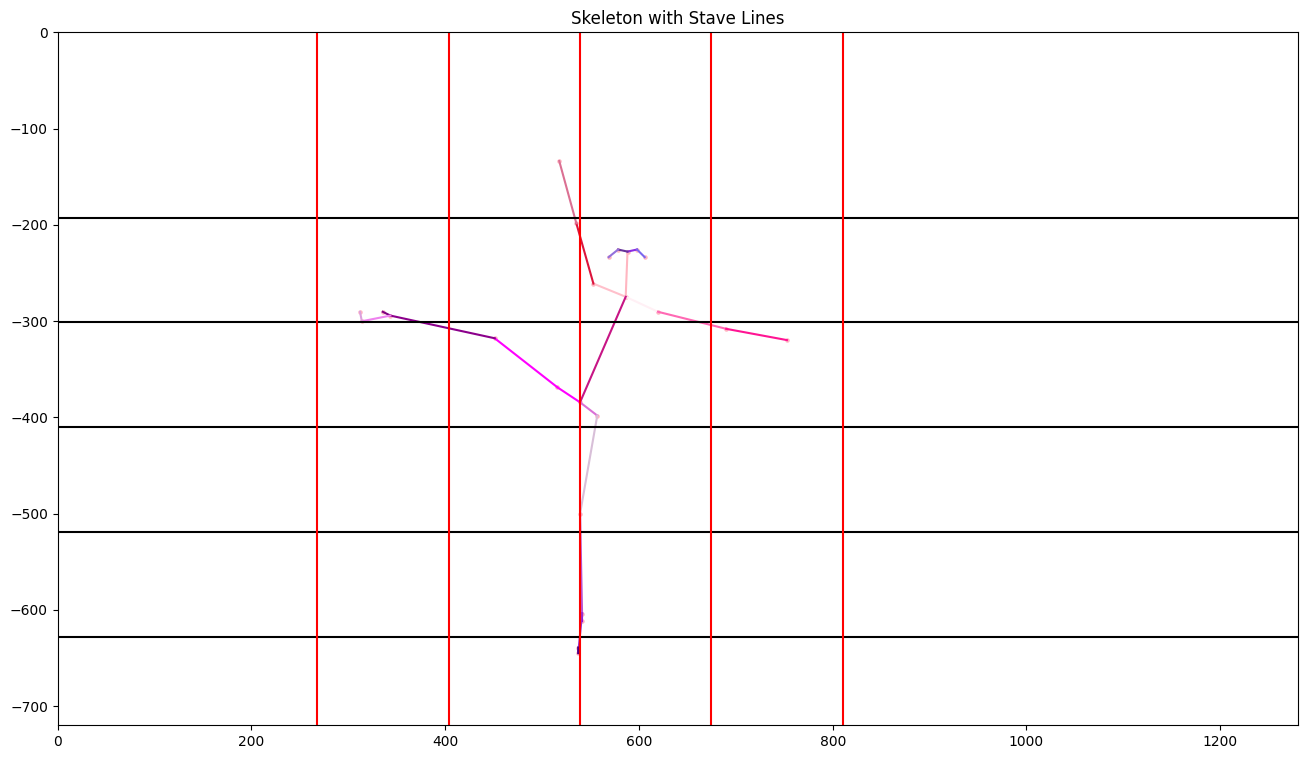

In [25]:
#TEST CODE TO VISUALIZE FRAME WITH STAVE LINES
#Plot a single sample frame with stave_Lines
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_prop_cycle('color',penColor)
plt.title('Skeleton with Stave Lines')
plt.xlim(0, 1280)
plt.ylim(-720, 0)


#ToComment
#ExtSecondleft start: 1973, a good end one: 1981
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000002158_keypoints.json" #Right
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001981_keypoints.json" #Left
sample_json_file_pth = "/Users/margauxbowditch/Dropbox/PhD/Last_Visuals/SWA0010/SWA0010_000000002158_keypoints.json" #Macbook
#Ext on right test range: 2151, 2165. 2160 = highest second.
st_lines_arr = establish_stave_lines(sample_json_file_pth)
sag_lines_arr = establishSaggitalLines(sample_json_file_pth)
img_json = pd.read_json(sample_json_file_pth)
keypoints = img_json.people[0]['pose_keypoints_2d']
#print(keypoints)
x = keypoints[0::3]
yorig = keypoints[1::3]
corig = keypoints[2::3]
y = [-y for y in yorig]
sc = ax.scatter(x,y, s=5)
for bone in bones:
    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
        continue
    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])
plt.axhline(y = -st_lines_arr[0], color = 'black', linestyle = '-')
plt.axhline(y=-st_lines_arr[1], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[2], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[3], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[4], color = 'black', linestyle = '-')

plt.axvline(x = sag_lines_arr[0], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[1], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[2], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[3], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[4], color = 'red', linestyle = '-')
#toComment

In [6]:
#Helper method
def calculate_absolute_gradient(x1, y1, x2, y2): #used in method below: getSingleFootOrientation
    if(x1 == x2):
        return "undefined"
    gradient = (y2 - y1) / (x2 - x1)
    absolute_gradient = abs(gradient)
    return absolute_gradient

#Helper method # Returns the supporting foot's coordinates in dictionary form: 'LF_RF: 'left'/'right', Heel: [x,y], ...
def determineSupportingFootCoordinates(file_path): #used in method below: getSupportingFootOrientation
    foot_dict = {}
    #print("determining supporting foot coords...")
    skel_json = pd.read_json(file_path)
    keypoints = skel_json.people[0]['pose_keypoints_2d']
    x = keypoints[0::3]
    y = keypoints[1::3]
    supportingf_lowest_value = 0 # this refers to visually lowest ie, the max in pixel values.
    supportingf_lowest_index = 0
    foot_indices = [11,14,19,20,21,22,23,24]
    for i in foot_indices:
        if y[i] > supportingf_lowest_value:
            supportingf_lowest_value = y[i]
            supportingf_lowest_index = i
            
    #print("supporting foot index: ", supportingf_lowest_index)
    right_or_left = ''
    if supportingf_lowest_index == 22 or supportingf_lowest_index == 23 or supportingf_lowest_index == 11 or supportingf_lowest_index == 24:
        right_or_left = 'right'
        foot_dict['RF_LF'] = right_or_left
        foot_dict['Heel'] = [x[24],y[24]]
        foot_dict['Ankle'] = [x[11],y[11]]
        foot_dict['BigToe'] = [x[22], y[22]]
        foot_dict['SmallToe'] = [x[23], y[23]]
    elif supportingf_lowest_index == 19 or supportingf_lowest_index == 20 or supportingf_lowest_index == 14 or supportingf_lowest_index == 21:
        right_or_left = 'left'
        foot_dict['RF_LF'] = right_or_left
        foot_dict['Heel'] = [x[21],y[21]]
        foot_dict['Ankle'] = [x[14],y[14]]
        foot_dict['BigToe'] = [x[19], y[19]]
        foot_dict['SmallToe'] = [x[20], y[20]]
    #print(foot_dict)
    return foot_dict

#Helper method
def getSingleFootOrientation(HeelX,HeelY,BigToeX,BigToeY): #used in below method - getSupportingFootOrientation
    feet_gradient = calculate_absolute_gradient(HeelX, HeelY, BigToeX, BigToeY)
    foot_orientation = "Not_Calculated"
    #print("feet_gradient: ",feet_gradient)
    if feet_gradient == 'undefined':
        foot_orientation = "EnPointe"
    elif feet_gradient >= 0 and feet_gradient <= 0.2:
        foot_orientation = "Flat"
    elif feet_gradient > 0.2 and feet_gradient <= 1:
        foot_orientation = "Demi"
    elif feet_gradient > 1:
        foot_orientation = "EnPointe"
    return foot_orientation
    
#Returns "Flat", "Demi" or "EnPointe"
def getSupportingFootOrientation(file_path): # is it flat, demi or en pointe?
    supp_ft_coords = determineSupportingFootCoordinates(file_path)
    if len(supp_ft_coords) == 0:
        #print(f"NO SUPPORTING FOOT COORDS DETECTED: {file_path}")
        return "None"
    else:
        #print("determining supporting foot orientation...")
        #calculate the gardient between the Heel and the BigToe
        x1 = supp_ft_coords['Heel'][0]
        y1 = supp_ft_coords['Heel'][1]
        x2 = supp_ft_coords['BigToe'][0]
        y2 = supp_ft_coords['BigToe'][1]
        #print(f"x1: {x1} y1: {y1}, x2: {x2} y2:{y2} ")
        foot_orientation = getSingleFootOrientation(x1, y1, x2, y2) 
        #print("Supporting foot orientation:", foot_orientation)
        return foot_orientation

In [14]:
def getBaseVecDictionary():
    #0-12 for staveline vertical position; 13-15 for in-front, level, behind; 16-20 for left, left-mid, mid, right-mid, right
    base_dict = {}
    vector_keywords = ['justbelowfeet','feet','justabovefeet','betweenfeetknees', 'knees', 'betweenkneeswaist',\
                       'waist','betweenwaistshoulders','shoulders', 'betweenshouldershead', 'head', 'abovehead', 'front', \
                       'level','behind','left', 'leftmid', 'mid', 'rightmid', 'right']
    #print(len(vector_keywords))
    i=0
    for kw in vector_keywords:
        base_dict[kw] = i
        i=i+1
    #print(base_dict)
    return base_dict
    #base_dict['bel
getBaseVecDictionary()

{'justbelowfeet': 0,
 'feet': 1,
 'justabovefeet': 2,
 'betweenfeetknees': 3,
 'knees': 4,
 'betweenkneeswaist': 5,
 'waist': 6,
 'betweenwaistshoulders': 7,
 'shoulders': 8,
 'betweenshouldershead': 9,
 'head': 10,
 'abovehead': 11,
 'front': 12,
 'level': 13,
 'behind': 14,
 'left': 15,
 'leftmid': 16,
 'mid': 17,
 'rightmid': 18,
 'right': 19}

In [8]:
def determineSaggitalPosition(sag_lines,x): # returns the vector position.
    # in openpose frame saggital positions: 4 3 (dancer's right) 2 (midline) 1 0 (dancer's left)
     #[left_line, left_mid_line, midline, right_mid_line, right_line]
    left_left_mid_dist = sag_lines[0] - sag_lines[1]
    midline_left_mid_dist = sag_lines[1] - sag_lines[2]
    midline_right_mid_dist = sag_lines[2] - sag_lines[3]   
    right_right_mid_dist = sag_lines[3] - sag_lines[4]
     
    x_index = 0
    #check where x lies:
    #between dancer's right_line and right_mid_line:
    if x >= sag_lines[4] and x < sag_lines[3]:
        if x == sag_lines[4]:
            x_index = 4
        x_to_right_dist = x - sag_lines[4]
        x_to_right_mid_dist = sag_lines[3] - x
        if x_to_right_dist < x_to_right_mid_dist:
            x_index = 4
        else:
            x_index = 3       
    #between right_mid_line and mid_line:
    if x >= sag_lines[3] and x < sag_lines[2]:
        if x == sag_lines[3]:
            x_index = 3
        x_to_right_mid_dist = x - sag_lines[3]
        x_to_mid_dist = sag_lines[2] - x
        if x_to_right_mid_dist < x_to_mid_dist:
            x_index = 3
        else:
            x_index = 2
            
    #between mid_line and left_mid_line:
    if x >= sag_lines[2] and x < sag_lines[1]:
        if x == sag_lines[2]:
            x_index = 2
        x_to_mid_dist = x - sag_lines[2]
        x_to_left_mid_dist = sag_lines[1] - x
        if x_to_mid_dist < x_to_left_mid_dist:
            x_index = 2
        else:
            x_index = 1
    
    #between left_mid_line and left_line:
    if x >= sag_lines[1] and x <= sag_lines[0]:
        if x == sag_lines[1]:
            x_index = 1
        if x == sag_lines[0]:
            x_index = 0
        x_to_left_mid_dist = x - sag_lines[1]
        x_to_left_dist = sag_lines[0] - x
        if x_to_left_mid_dist < x_to_left_dist:
            x_index = 1
        else:
            x_index = 0
    vec_dict = getBaseVecDictionary() 
    #print(x_index)
    return x_index + vec_dict['left'] # to get the index in the benesh vector where the saggital positions start.

In [9]:
def determinePointVerticalPosition(ycoord, stavelines, vec_dict):
    #stave lines are in format: [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    benesh_vec_pos = 0
    if ycoord < stavelines[0]: # fixed - had it incorrectly as >
        benesh_vec_pos = vec_dict['abovehead']
    #distances between stavelines are the same - determine for only one:
    betw_stvl_dist = stavelines[3] - stavelines[0]
    #print(betw_stvl_dist)
    padding_value = betw_stvl_dist/8
    feetline = stavelines[1]
    kneesline = stavelines[4]
    waistline = stavelines[2]
    shoulderline = stavelines[3]
    headline = stavelines[0]
    
    #[larger val(lower), smaller val(higher)]
    feetLine_range = [feetline + padding_value, feetline - padding_value]
    feet_knees_range = [feetline - padding_value, kneesline + padding_value]
    kneesLine_range = [kneesline + padding_value, kneesline - padding_value]
    knees_waist_range = [kneesline - padding_value, waistline + padding_value]
    waistLine_range = [waistline + padding_value, waistline - padding_value]
    waist_shoulder_range = [waistline - padding_value, shoulderline + padding_value]
    shoulderLine_range = [shoulderline + padding_value, shoulderline - padding_value]
    shoulder_head_range = [shoulderline - padding_value, headline +padding_value]
    headLine_range = [headline + padding_value, headline - padding_value]
    
    if ycoord <= feetLine_range[0] and ycoord >= feetLine_range[1]:
        benesh_vec_pos = vec_dict['feet']
    if ycoord < feet_knees_range[0] and ycoord > feet_knees_range[1]:
        benesh_vec_pos = vec_dict['betweenfeetknees']
    if ycoord <= kneesLine_range[0] and ycoord >= kneesLine_range[1]:
        benesh_vec_pos = vec_dict['knees']
    if ycoord < knees_waist_range[0] and ycoord > knees_waist_range[1]:
        benesh_vec_pos = vec_dict['betweenkneeswaist']
    if ycoord <= waistLine_range[0] and ycoord >= waistLine_range[1]:
        benesh_vec_pos = vec_dict['waist']
    if ycoord < waist_shoulder_range[0] and ycoord > waist_shoulder_range[1]:
        benesh_vec_pos = vec_dict['betweenwaistshoulders']
    if ycoord <= shoulderLine_range[0] and ycoord >= shoulderLine_range[1]:
        benesh_vec_pos = vec_dict['shoulders']
    if ycoord < shoulder_head_range[0] and ycoord > shoulder_head_range[1]:
        benesh_vec_pos = vec_dict['betweenshouldershead']
    if ycoord >= headLine_range[0] and ycoord <= headLine_range[1]:
        benesh_vec_pos = vec_dict['head']
    #print(benesh_vec_pos)
    return benesh_vec_pos

In [10]:
#Class 12 main method:
def createExtSecondRightBeneshVector(json_file_path):
    #Get the skeleton vector
    skel_json = pd.read_json(json_file_path)
    keypoints = skel_json.people[0]['pose_keypoints_2d']
    x = keypoints[0::3]
    y = keypoints[1::3]
    
    #get the stave lines for this file [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    st_lines_arr = establish_stave_lines(json_file_path)
    sag_lines = establishSaggitalLines(json_file_path) 
    #sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line] #represents the dancer's left and right (not audience)
    vec_dict = getBaseVecDictionary()
    #print("vec_dict:", vec_dict)
    
    #right foot: For ExtSecondRight this is the foot that is lifting
    rf_vec = [0 for element in range(len(vec_dict))]
    #use rbigtoe to get the vertical position (22):
    rf_vertical_index = determinePointVerticalPosition(y[22], st_lines_arr, vec_dict)
    rf_coronal_index = vec_dict['level'] # always level for ExtSecond
    #determine saggital position of the rbigtoe (22)
    rf_saggital_index = determineSaggitalPosition(sag_lines,x[22])
   
    rf_vec[rf_vertical_index] = 1
    rf_vec[rf_coronal_index] = 1
    rf_vec[rf_saggital_index] = 1
    
    #left foot: For ExtSecond this is the supporting foot:
    lf_vec = [0 for elem in range(len(vec_dict))]
    supp_ft_orientation = getSupportingFootOrientation(json_file_path)
    lf_vertical_index = 0
    if supp_ft_orientation == 'EnPointe':
        lf_vertical_index = vec_dict['justabovefeet']
    elif supp_ft_orientation == 'Demi':
        lf_vertical_index = vec_dict['feet']
    elif supp_ft_orientation == 'Flat':
        lf_vertical_index = vec_dict['justbelowfeet']  
    lf_coronal_index = vec_dict['level'] # always level for the supporting foot
    #determine saggital position of left big toe (19)
    lf_saggital_index = determineSaggitalPosition(sag_lines,x[19])
    lf_vec[lf_vertical_index] = 1
    lf_vec[lf_coronal_index] = 1
    lf_vec[lf_saggital_index] = 1
    
    #right hand:
    rh_vec = [0 for elem in range(len(vec_dict))]
    #determine vertical position
    rh_vertical_index = determinePointVerticalPosition(y[4], st_lines_arr, vec_dict)
    #determine saggital position
    rh_saggital_index = determineSaggitalPosition(sag_lines, x[4])
    #default coronal position - let's make it level:
    rh_coronal_index = vec_dict['level']
    #determine sign: above head (in front), close to midline saggital (in front), else: level (not usually behind for echappe)
    if rh_vertical_index == vec_dict['abovehead']:
        rh_coronal_index = vec_dict['front']
    elif rh_saggital_index == vec_dict['mid']: # if close to midline: it is in front:
        rh_coronal_index = vec_dict['front']
    else:
        rh_coronal_index = vec_dict['level'] # otherwise it is level - when it's closer to right_mid or right
    rh_vec[rh_vertical_index] = 1
    rh_vec[rh_coronal_index] = 1
    rh_vec[rh_saggital_index] = 1 
    
     #left hand
    lh_vec = [0 for elem in range(len(vec_dict))]
    #determine vertical position
    lh_vertical_index = determinePointVerticalPosition(y[7], st_lines_arr, vec_dict)
    #determine saggital position
    lh_saggital_index = determineSaggitalPosition(sag_lines, x[7])
    #default coronal position - let's make it level:
    lh_coronal_index = vec_dict['level']
    #determine sign: above head (in front), close to midline (in front), else: level (not usually behind for echappe)
    if lh_vertical_index == vec_dict['abovehead']:
        lh_coronal_index = vec_dict['front']
    elif lh_saggital_index == vec_dict['mid']: # if close to midline: it is in front
        lh_coronal_index = vec_dict['front']
    else:
        lh_coronal_index = vec_dict['level'] #otherwise it's level
    lh_vec[lh_vertical_index] = 1
    lh_vec[lh_coronal_index] = 1
    lh_vec[lh_saggital_index] = 1
    
    turn_bit = [0]
    
    final_vec = rf_vec + lf_vec + rh_vec +lh_vec + turn_bit
    #print(final_vec)
    #print(len(final_vec))
    base_save_file_ls = json_file_path.split("/")
    skeleton_name = base_save_file_ls[-1]
    benesh_name = skeleton_name.replace('keypoints','benesh')
    #print("benesh_name: ",benesh_name)
    save_benesh_path = "./BeneshYDataPerClass/12-ExtSecondRight/"+benesh_name
    #print(save_benesh_path)
    with open(save_benesh_path, 'w') as f:
        json.dump(final_vec, f)
    return final_vec
    
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000002158_keypoints.json"
#createExtSecondRightBeneshVector(sample_json_file_pth)
    

In [11]:
#Class 13 main method:
def createExtSecondLeftBeneshVector(json_file_path):
    #Get the skeleton vector
    skel_json = pd.read_json(json_file_path)
    keypoints = skel_json.people[0]['pose_keypoints_2d']
    x = keypoints[0::3]
    y = keypoints[1::3]
    
    #get the stave lines for this file [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    st_lines_arr = establish_stave_lines(json_file_path)
    sag_lines = establishSaggitalLines(json_file_path) 
    #sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line] #represents the dancer's left and right (not audience)
    vec_dict = getBaseVecDictionary()
    #print("vec_dict:", vec_dict)
    
    #right foot: For ExtSecondLeft this is the supporting foot
    rf_vec = [0 for elem in range(len(vec_dict))]
    supp_ft_orientation = getSupportingFootOrientation(json_file_path)
    #print("Supp_ft_orientation", supp_ft_orientation)
    rf_vertical_index = 0
    if supp_ft_orientation == 'EnPointe':
        rf_vertical_index = vec_dict['justabovefeet']
    elif supp_ft_orientation == 'Demi':
        rf_vertical_index = vec_dict['feet']
    elif supp_ft_orientation == 'Flat':
        rf_vertical_index = vec_dict['justbelowfeet']  
    rf_coronal_index = vec_dict['level'] # always level for the supporting foot
    #determine saggital position of right big toe (22)
    #print("RHEEL COORD:", x[24])
    #print("RBIGTOE COORD:", x[22])
    rf_saggital_index = determineSaggitalPosition(sag_lines,x[22])
    rf_vec[rf_vertical_index] = 1
    rf_vec[rf_coronal_index] = 1
    rf_vec[rf_saggital_index] = 1
    
    #left foot: for ExtSecondLeft this is the lifting leg
    lf_vec = [0 for element in range(len(vec_dict))]
    #use lbigtoe to get the vertical position (19):
    lf_vertical_index = determinePointVerticalPosition(y[19], st_lines_arr, vec_dict)
    lf_coronal_index = vec_dict['level'] # always level for ExtSecond
    #determine saggital position of the lbigtoe (19)
    lf_saggital_index = determineSaggitalPosition(sag_lines,x[19])
    lf_vec[lf_vertical_index] = 1
    lf_vec[lf_coronal_index] = 1
    lf_vec[lf_saggital_index] = 1
    
    #right hand:
    rh_vec = [0 for elem in range(len(vec_dict))]
    #determine vertical position
    rh_vertical_index = determinePointVerticalPosition(y[4], st_lines_arr, vec_dict)
    #determine saggital position
    rh_saggital_index = determineSaggitalPosition(sag_lines, x[4])
    #default coronal position - let's make it level:
    rh_coronal_index = vec_dict['level']
    #determine sign: above head (in front), close to midline saggital (in front), else: level (not usually behind for echappe)
    if rh_vertical_index == vec_dict['abovehead']:
        rh_coronal_index = vec_dict['front']
    elif rh_saggital_index == vec_dict['mid']: # if close to midline: it is in front:
        rh_coronal_index = vec_dict['front']
    else:
        rh_coronal_index = vec_dict['level'] # otherwise it is level - when it's closer to right_mid or right
    rh_vec[rh_vertical_index] = 1
    rh_vec[rh_coronal_index] = 1
    rh_vec[rh_saggital_index] = 1 
    
    #left hand:
    lh_vec = [0 for elem in range(len(vec_dict))]
    #determine vertical position
    lh_vertical_index = determinePointVerticalPosition(y[7], st_lines_arr, vec_dict)
    #determine saggital position
    lh_saggital_index = determineSaggitalPosition(sag_lines, x[7])
    #default coronal position - let's make it level:
    lh_coronal_index = vec_dict['level']
    #determine sign: above head (in front), close to midline (in front), else: level (not usually behind for echappe)
    if lh_vertical_index == vec_dict['abovehead']:
        lh_coronal_index = vec_dict['front']
    elif lh_saggital_index == vec_dict['mid']: # if close to midline: it is in front
        lh_coronal_index = vec_dict['front']
    else:
        lh_coronal_index = vec_dict['level'] #otherwise it's level
    lh_vec[lh_vertical_index] = 1
    lh_vec[lh_coronal_index] = 1
    lh_vec[lh_saggital_index] = 1
    
    turn_bit = [0]
    
    final_vec = rf_vec + lf_vec + rh_vec +lh_vec + turn_bit
    #print(final_vec)
    #print(len(final_vec))
    base_save_file_ls = json_file_path.split("/")
    skeleton_name = base_save_file_ls[-1]
    benesh_name = skeleton_name.replace('keypoints','benesh')
    #print("benesh_name: ",benesh_name)
    save_benesh_path = "./BeneshYDataPerClass/13-ExtSecondLeft/"+benesh_name
    #print(save_benesh_path)
    with open(save_benesh_path, 'w') as f:
        json.dump(final_vec, f)
    return final_vec
    
# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001981_keypoints.json"
# createExtSecondLeftBeneshVector(sample_json_file_pth)    

    

In [26]:
def BeneshVecToText(benesh_vec):
    vec_dict = getBaseVecDictionary()
    rev_vec_dict = {y: x for x, y in vec_dict.items()}
    #print(rev_vec_dict)
    rf_vec = benesh_vec[0:20]
    lf_vec = benesh_vec[20:40]
    rh_vec = benesh_vec[40:60]
    lh_vec = benesh_vec[60:80]
    #print(lh_vec)
    #print(len(lf_vec))
    rf_text = []
    lf_text = []
    rh_text = []
    lh_text = []

    #84 indices in length {[0 - 20] = right foot} {[21 - 41] = left foot} {[42-62] = right hand} {[63-83] = left hand}
    for i in range(len(rf_vec)): #vectors are the same length
        if rf_vec[i] == 1:
            #print("rf",rev_vec_dict[i])
            rf_text.append(rev_vec_dict[i])
            
    for i in range(len(lf_vec)):
        if lf_vec[i] == 1:
            #print("lf",rev_vec_dict[i])
            lf_text.append(rev_vec_dict[i])
    
    for i in range(len(rh_vec)): #vectors are the same length
        if rh_vec[i] == 1:
            #print("rh",rev_vec_dict[i])
            rh_text.append(rev_vec_dict[i])
        
    for i in range(len(lh_vec)): #vectors are the same length
        if lh_vec[i] == 1:
            #print("lh",rev_vec_dict[i])
            lh_text.append(rev_vec_dict[i])
    
    print(f"Right Foot: <Vertical: {rf_text[0]}> <Coronal: {rf_text[1]}> <Saggital: {rf_text[2]}>")
    print(f"Left Foot: <Vertical: {lf_text[0]}> <Coronal: {lf_text[1]}> <Saggital: {lf_text[2]}>")
    print(f"Right Hand: <Vertical: {rh_text[0]}> <Coronal: {rh_text[1]}> <Saggital: {rh_text[2]}>")
    print(f"Left Hand: <Vertical: {lh_text[0]}> <Coronal: {lh_text[1]}> <Saggital: {lh_text[2]}>")
    print(f"Turn bit: {benesh_vec[80]}")
    print(f"OVERALL LENGTH: {len(benesh_vec)}")
    
#Right
# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000002158_keypoints.json"
# bv =createExtSecondRightBeneshVector(sample_json_file_pth)

#Left
# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/SWA0010/SWA0010_000000001981_keypoints.json"
# bv = createExtSecondLeftBeneshVector(sample_json_file_pth)   
# BeneshVecToText(bv)


BMN_file = "/Users/margauxbowditch/Dropbox/PhD/Last_Visuals/ExtSecondRight/SWA0010_000000002158_benesh.json"
with open(BMN_file, "r") as file:
    BMNVec = json.load(file)
print(BMNVec)
BeneshVecToText(BMNVec)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
Right Foot: <Vertical: shoulders> <Coronal: level> <Saggital: right>
Left Foot: <Vertical: justabovefeet> <Coronal: level> <Saggital: mid>
Right Hand: <Vertical: abovehead> <Coronal: front> <Saggital: mid>
Left Hand: <Vertical: betweenwaistshoulders> <Coronal: level> <Saggital: left>
Turn bit: 0
OVERALL LENGTH: 81


In [12]:
#Loop through all the ExtSecondRight (class 12) json files and create and save benesh vectors for them
import os
keypoints_folder = "./SkeletonXDataUnnormalised/12-ExtSecondRight"

def getTotalFiles():
    total = 0
    for file in os.listdir(keypoints_folder):
        total+=1
    print(total)
    return total

def MakeBeneshForClass12(kpf):
    total_num_files = getTotalFiles()
    counter = 0
    for jsonFile in os.listdir(kpf):
        json_path = keypoints_folder+"/"+jsonFile
        print(json_path)
        createExtSecondRightBeneshVector(json_path)
        counter+=1
        print(f"{counter}/{total_num_files} DONE")
    
MakeBeneshForClass12(keypoints_folder)

11238
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000675_keypoints.json
1/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000676_keypoints.json
2/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000677_keypoints.json
3/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000678_keypoints.json
4/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000679_keypoints.json
5/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000680_keypoints.json
6/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000681_keypoints.json
7/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000682_keypoints.json
8/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000683_keypoints.json
9/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ACM0015_000000000684_keypoints.json
10/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRig

89/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0021_000000000369_keypoints.json
90/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0021_000000000370_keypoints.json
91/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0021_000000000371_keypoints.json
92/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0021_000000000372_keypoints.json
93/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0021_000000000373_keypoints.json
94/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0021_000000000374_keypoints.json
95/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0026_000000000343_keypoints.json
96/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0026_000000000344_keypoints.json
97/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0026_000000000345_keypoints.json
98/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BAS0026_000000000346_keypoints.json
99/11238 DONE
./SkeletonXDataUnnormalise

174/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0005_000000000298_keypoints.json
175/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000081_keypoints.json
176/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000082_keypoints.json
177/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000083_keypoints.json
178/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000084_keypoints.json
179/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000085_keypoints.json
180/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000086_keypoints.json
181/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000087_keypoints.json
182/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000088_keypoints.json
183/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0007_000000000090_keypoints.json
184/11238 DONE
./SkeletonXData

264/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000075_keypoints.json
265/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000076_keypoints.json
266/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000077_keypoints.json
267/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000078_keypoints.json
268/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000080_keypoints.json
269/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000316_keypoints.json
270/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000317_keypoints.json
271/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000319_keypoints.json
272/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000321_keypoints.json
273/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0018_000000000322_keypoints.json
274/11238 DONE
./SkeletonXData

351/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000068_keypoints.json
352/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000069_keypoints.json
353/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000075_keypoints.json
354/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000284_keypoints.json
355/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000285_keypoints.json
356/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000287_keypoints.json
357/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000288_keypoints.json
358/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000289_keypoints.json
359/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000290_keypoints.json
360/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BLU0026_000000000291_keypoints.json
361/11238 DONE
./SkeletonXData

438/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0003_000000000673_keypoints.json
439/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0004_000000000552_keypoints.json
440/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0004_000000000553_keypoints.json
441/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0004_000000000558_keypoints.json
442/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0004_000000000650_keypoints.json
443/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0004_000000000652_keypoints.json
444/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0004_000000000654_keypoints.json
445/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0005_000000000568_keypoints.json
446/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0005_000000000569_keypoints.json
447/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0005_000000000570_keypoints.json
448/11238 DONE
./SkeletonXData

529/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0017_000000000637_keypoints.json
530/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0017_000000000638_keypoints.json
531/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0017_000000000639_keypoints.json
532/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0017_000000000640_keypoints.json
533/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0017_000000000643_keypoints.json
534/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0017_000000000644_keypoints.json
535/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0017_000000000648_keypoints.json
536/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0020_000000000549_keypoints.json
537/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0020_000000000550_keypoints.json
538/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0020_000000000551_keypoints.json
539/11238 DONE
./SkeletonXData

614/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0023_000000000670_keypoints.json
615/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0023_000000000671_keypoints.json
616/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0023_000000000672_keypoints.json
617/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0023_000000000673_keypoints.json
618/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0023_000000000674_keypoints.json
619/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0024_000000000522_keypoints.json
620/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0024_000000000523_keypoints.json
621/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0024_000000000524_keypoints.json
622/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0024_000000000525_keypoints.json
623/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/BRO0024_000000000526_keypoints.json
624/11238 DONE
./SkeletonXData

701/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001505_keypoints.json
702/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001506_keypoints.json
703/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001507_keypoints.json
704/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001508_keypoints.json
705/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001509_keypoints.json
706/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001510_keypoints.json
707/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001511_keypoints.json
708/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001512_keypoints.json
709/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001577_keypoints.json
710/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0001_000000001578_keypoints.json
711/11238 DONE
./SkeletonXData

793/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001188_keypoints.json
794/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001189_keypoints.json
795/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001192_keypoints.json
796/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001193_keypoints.json
797/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001194_keypoints.json
798/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001195_keypoints.json
799/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001196_keypoints.json
800/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001197_keypoints.json
801/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001198_keypoints.json
802/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0006_000000001199_keypoints.json
803/11238 DONE
./SkeletonXData

881/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0012_000000001722_keypoints.json
882/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0012_000000001723_keypoints.json
883/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0012_000000001724_keypoints.json
884/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0012_000000001725_keypoints.json
885/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0012_000000001726_keypoints.json
886/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0012_000000001727_keypoints.json
887/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0013_000000001143_keypoints.json
888/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0013_000000001144_keypoints.json
889/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0013_000000001145_keypoints.json
890/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0013_000000001146_keypoints.json
891/11238 DONE
./SkeletonXData

971/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001656_keypoints.json
972/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001657_keypoints.json
973/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001658_keypoints.json
974/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001659_keypoints.json
975/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001660_keypoints.json
976/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001661_keypoints.json
977/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001662_keypoints.json
978/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001663_keypoints.json
979/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001664_keypoints.json
980/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0016_000000001665_keypoints.json
981/11238 DONE
./SkeletonXData

1057/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001435_keypoints.json
1058/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001436_keypoints.json
1059/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001487_keypoints.json
1060/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001488_keypoints.json
1061/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001490_keypoints.json
1062/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001492_keypoints.json
1063/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001494_keypoints.json
1064/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001495_keypoints.json
1065/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CAL0022_000000001496_keypoints.json
1066/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0004_000000000534_keypoints.json
1067/11238 DONE
./Sk

1142/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0011_000000000536_keypoints.json
1143/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0011_000000000537_keypoints.json
1144/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0011_000000000538_keypoints.json
1145/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0012_000000000534_keypoints.json
1146/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0012_000000000535_keypoints.json
1147/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0012_000000000536_keypoints.json
1148/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0012_000000000537_keypoints.json
1149/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0012_000000000538_keypoints.json
1150/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0012_000000000539_keypoints.json
1151/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/COL0012_000000000540_keypoints.json
1152/11238 DONE
./Sk

1226/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000297_keypoints.json
1227/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000298_keypoints.json
1228/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000300_keypoints.json
1229/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000302_keypoints.json
1230/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000304_keypoints.json
1231/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000305_keypoints.json
1232/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000306_keypoints.json
1233/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/CUP0016_000000000307_keypoints.json
1234/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DAA0000_000000001717_keypoints.json
1235/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DAA0000_000000001718_keypoints.json
1236/11238 DONE
./Sk

1314/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0009_000000001526_keypoints.json
1315/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0009_000000001527_keypoints.json
1316/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0009_000000001528_keypoints.json
1317/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0009_000000001529_keypoints.json
1318/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0009_000000001530_keypoints.json
1319/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0021_000000001835_keypoints.json
1320/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0021_000000001837_keypoints.json
1321/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0021_000000001838_keypoints.json
1322/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0021_000000001839_keypoints.json
1323/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/DUL0021_000000001840_keypoints.json
1324/11238 DONE
./Sk

1401/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000107_keypoints.json
1402/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000108_keypoints.json
1403/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000109_keypoints.json
1404/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000110_keypoints.json
1405/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000111_keypoints.json
1406/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000112_keypoints.json
1407/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000113_keypoints.json
1408/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000115_keypoints.json
1409/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000116_keypoints.json
1410/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0000_000000000118_keypoints.json
1411/11238 DONE
./Sk

1491/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000245_keypoints.json
1492/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000246_keypoints.json
1493/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000247_keypoints.json
1494/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000248_keypoints.json
1495/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000250_keypoints.json
1496/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000251_keypoints.json
1497/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000256_keypoints.json
1498/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000388_keypoints.json
1499/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000389_keypoints.json
1500/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0010_000000000390_keypoints.json
1501/11238 DONE
./Sk

1575/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000269_keypoints.json
1576/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000270_keypoints.json
1577/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000272_keypoints.json
1578/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000416_keypoints.json
1579/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000417_keypoints.json
1580/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000418_keypoints.json
1581/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000419_keypoints.json
1582/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000420_keypoints.json
1583/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000421_keypoints.json
1584/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0025_000000000422_keypoints.json
1585/11238 DONE
./Sk

1659/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000091_keypoints.json
1660/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000093_keypoints.json
1661/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000094_keypoints.json
1662/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000095_keypoints.json
1663/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000102_keypoints.json
1664/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000236_keypoints.json
1665/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000237_keypoints.json
1666/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000238_keypoints.json
1667/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000239_keypoints.json
1668/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0035_000000000242_keypoints.json
1669/11238 DONE
./Sk

1749/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000093_keypoints.json
1750/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000094_keypoints.json
1751/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000095_keypoints.json
1752/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000096_keypoints.json
1753/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000231_keypoints.json
1754/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000232_keypoints.json
1755/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000233_keypoints.json
1756/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000234_keypoints.json
1757/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000235_keypoints.json
1758/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0038_000000000236_keypoints.json
1759/11238 DONE
./Sk

1840/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000245_keypoints.json
1841/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000246_keypoints.json
1842/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000247_keypoints.json
1843/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000248_keypoints.json
1844/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000249_keypoints.json
1845/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000250_keypoints.json
1846/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000251_keypoints.json
1847/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000377_keypoints.json
1848/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000379_keypoints.json
1849/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0041_000000000381_keypoints.json
1850/11238 DONE
./Sk

1925/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002175_keypoints.json
1926/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002176_keypoints.json
1927/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002177_keypoints.json
1928/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002179_keypoints.json
1929/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002181_keypoints.json
1930/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002182_keypoints.json
1931/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002183_keypoints.json
1932/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002184_keypoints.json
1933/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002185_keypoints.json
1934/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0047_000000002189_keypoints.json
1935/11238 DONE
./Sk

2009/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002196_keypoints.json
2010/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002197_keypoints.json
2011/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002198_keypoints.json
2012/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002199_keypoints.json
2013/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002200_keypoints.json
2014/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002201_keypoints.json
2015/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002202_keypoints.json
2016/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002229_keypoints.json
2017/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002230_keypoints.json
2018/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0048_000000002231_keypoints.json
2019/11238 DONE
./Sk

2094/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000252_keypoints.json
2095/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000255_keypoints.json
2096/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000256_keypoints.json
2097/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000257_keypoints.json
2098/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000258_keypoints.json
2099/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000259_keypoints.json
2100/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000261_keypoints.json
2101/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000262_keypoints.json
2102/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000399_keypoints.json
2103/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0053_000000000402_keypoints.json
2104/11238 DONE
./Sk

2183/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0056_000000002210_keypoints.json
2184/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0056_000000002211_keypoints.json
2185/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0056_000000002213_keypoints.json
2186/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/ESM0056_000000002216_keypoints.json
2187/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/FPF0012_000000001420_keypoints.json
2188/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/FPF0012_000000001421_keypoints.json
2189/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/FPF0012_000000001422_keypoints.json
2190/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/FPF0012_000000001423_keypoints.json
2191/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/FPF0012_000000001424_keypoints.json
2192/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/FPF0012_000000001425_keypoints.json
2193/11238 DONE
./Sk

2271/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000047_keypoints.json
2272/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000049_keypoints.json
2273/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000050_keypoints.json
2274/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000051_keypoints.json
2275/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000052_keypoints.json
2276/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000053_keypoints.json
2277/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000054_keypoints.json
2278/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000055_keypoints.json
2279/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000057_keypoints.json
2280/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0011_000000000058_keypoints.json
2281/11238 DONE
./Sk

2356/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0017_000000001522_keypoints.json
2357/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000032_keypoints.json
2358/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000033_keypoints.json
2359/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000034_keypoints.json
2360/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000035_keypoints.json
2361/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000036_keypoints.json
2362/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000037_keypoints.json
2363/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000039_keypoints.json
2364/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000040_keypoints.json
2365/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GAM0018_000000000042_keypoints.json
2366/11238 DONE
./Sk

2442/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000049_keypoints.json
2443/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000050_keypoints.json
2444/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000267_keypoints.json
2445/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000268_keypoints.json
2446/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000269_keypoints.json
2447/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000270_keypoints.json
2448/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000271_keypoints.json
2449/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000272_keypoints.json
2450/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000273_keypoints.json
2451/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0000_000000000274_keypoints.json
2452/11238 DONE
./Sk

2531/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0013_000000000283_keypoints.json
2532/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0013_000000000284_keypoints.json
2533/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0013_000000000286_keypoints.json
2534/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0014_000000000044_keypoints.json
2535/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0014_000000000045_keypoints.json
2536/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0014_000000000050_keypoints.json
2537/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0014_000000000053_keypoints.json
2538/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0014_000000000298_keypoints.json
2539/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0014_000000000299_keypoints.json
2540/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0014_000000000300_keypoints.json
2541/11238 DONE
./Sk

2621/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000039_keypoints.json
2622/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000040_keypoints.json
2623/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000269_keypoints.json
2624/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000270_keypoints.json
2625/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000271_keypoints.json
2626/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000272_keypoints.json
2627/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000273_keypoints.json
2628/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000274_keypoints.json
2629/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000275_keypoints.json
2630/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/GUL0021_000000000276_keypoints.json
2631/11238 DONE
./Sk

2710/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001347_keypoints.json
2711/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001348_keypoints.json
2712/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001349_keypoints.json
2713/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001350_keypoints.json
2714/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001351_keypoints.json
2715/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001352_keypoints.json
2716/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001353_keypoints.json
2717/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001354_keypoints.json
2718/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001355_keypoints.json
2719/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0001_000000001356_keypoints.json
2720/11238 DONE
./Sk

2796/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0007_000000000387_keypoints.json
2797/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0008_000000000085_keypoints.json
2798/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0008_000000000089_keypoints.json
2799/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0008_000000000091_keypoints.json
2800/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0008_000000000092_keypoints.json
2801/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0008_000000000348_keypoints.json
2802/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0010_000000000097_keypoints.json
2803/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0010_000000000098_keypoints.json
2804/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0010_000000000099_keypoints.json
2805/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0010_000000000100_keypoints.json
2806/11238 DONE
./Sk

2885/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000097_keypoints.json
2886/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000098_keypoints.json
2887/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000099_keypoints.json
2888/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000386_keypoints.json
2889/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000387_keypoints.json
2890/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000388_keypoints.json
2891/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000389_keypoints.json
2892/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000390_keypoints.json
2893/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000391_keypoints.json
2894/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0021_000000000392_keypoints.json
2895/11238 DONE
./Sk

2969/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000367_keypoints.json
2970/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000368_keypoints.json
2971/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000369_keypoints.json
2972/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000370_keypoints.json
2973/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000371_keypoints.json
2974/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000372_keypoints.json
2975/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000374_keypoints.json
2976/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000375_keypoints.json
2977/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000377_keypoints.json
2978/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/KIT0033_000000000378_keypoints.json
2979/11238 DONE
./Sk

3054/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000032_keypoints.json
3055/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000033_keypoints.json
3056/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000034_keypoints.json
3057/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000035_keypoints.json
3058/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000037_keypoints.json
3059/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000038_keypoints.json
3060/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000039_keypoints.json
3061/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000040_keypoints.json
3062/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000041_keypoints.json
3063/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30001_000000000042_keypoints.json
3064/11238 DONE
./Sk

3138/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000212_keypoints.json
3139/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000213_keypoints.json
3140/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000214_keypoints.json
3141/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000215_keypoints.json
3142/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000216_keypoints.json
3143/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000217_keypoints.json
3144/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000218_keypoints.json
3145/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000219_keypoints.json
3146/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000220_keypoints.json
3147/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30002_000000000221_keypoints.json
3148/11238 DONE
./Sk

3227/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000199_keypoints.json
3228/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000201_keypoints.json
3229/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000205_keypoints.json
3230/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000206_keypoints.json
3231/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000207_keypoints.json
3232/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000208_keypoints.json
3233/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000209_keypoints.json
3234/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000210_keypoints.json
3235/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000211_keypoints.json
3236/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30004_000000000212_keypoints.json
3237/11238 DONE
./Sk

3316/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000033_keypoints.json
3317/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000034_keypoints.json
3318/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000035_keypoints.json
3319/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000036_keypoints.json
3320/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000037_keypoints.json
3321/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000038_keypoints.json
3322/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000039_keypoints.json
3323/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000040_keypoints.json
3324/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000041_keypoints.json
3325/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000042_keypoints.json
3326/11238 DONE
./Sk

3401/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000755_keypoints.json
3402/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000756_keypoints.json
3403/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000757_keypoints.json
3404/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000758_keypoints.json
3405/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000760_keypoints.json
3406/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000761_keypoints.json
3407/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000763_keypoints.json
3408/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000764_keypoints.json
3409/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000765_keypoints.json
3410/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30005_000000000766_keypoints.json
3411/11238 DONE
./Sk

3490/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000371_keypoints.json
3491/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000376_keypoints.json
3492/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000377_keypoints.json
3493/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000378_keypoints.json
3494/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000379_keypoints.json
3495/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000381_keypoints.json
3496/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000382_keypoints.json
3497/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000535_keypoints.json
3498/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000536_keypoints.json
3499/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30006_000000000537_keypoints.json
3500/11238 DONE
./Sk

3577/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000458_keypoints.json
3578/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000459_keypoints.json
3579/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000461_keypoints.json
3580/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000462_keypoints.json
3581/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000463_keypoints.json
3582/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000464_keypoints.json
3583/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000465_keypoints.json
3584/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000466_keypoints.json
3585/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000467_keypoints.json
3586/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30008_000000000468_keypoints.json
3587/11238 DONE
./Sk

3663/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000028_keypoints.json
3664/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000030_keypoints.json
3665/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000032_keypoints.json
3666/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000033_keypoints.json
3667/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000034_keypoints.json
3668/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000035_keypoints.json
3669/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000036_keypoints.json
3670/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000037_keypoints.json
3671/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000042_keypoints.json
3672/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000043_keypoints.json
3673/11238 DONE
./Sk

3754/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000558_keypoints.json
3755/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000559_keypoints.json
3756/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000560_keypoints.json
3757/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000561_keypoints.json
3758/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000562_keypoints.json
3759/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000563_keypoints.json
3760/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000564_keypoints.json
3761/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000565_keypoints.json
3762/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000566_keypoints.json
3763/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30009_000000000567_keypoints.json
3764/11238 DONE
./Sk

3838/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000295_keypoints.json
3839/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000296_keypoints.json
3840/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000297_keypoints.json
3841/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000298_keypoints.json
3842/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000299_keypoints.json
3843/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000300_keypoints.json
3844/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000301_keypoints.json
3845/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000302_keypoints.json
3846/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000308_keypoints.json
3847/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30010_000000000309_keypoints.json
3848/11238 DONE
./Sk

3923/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000037_keypoints.json
3924/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000038_keypoints.json
3925/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000039_keypoints.json
3926/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000040_keypoints.json
3927/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000041_keypoints.json
3928/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000042_keypoints.json
3929/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000043_keypoints.json
3930/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000044_keypoints.json
3931/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000046_keypoints.json
3932/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000047_keypoints.json
3933/11238 DONE
./Sk

4011/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000638_keypoints.json
4012/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000639_keypoints.json
4013/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000640_keypoints.json
4014/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30012_000000000641_keypoints.json
4015/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30013_000000000038_keypoints.json
4016/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30013_000000000040_keypoints.json
4017/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30013_000000000041_keypoints.json
4018/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30013_000000000042_keypoints.json
4019/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30013_000000000043_keypoints.json
4020/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30013_000000000044_keypoints.json
4021/11238 DONE
./Sk

4097/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000027_keypoints.json
4098/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000033_keypoints.json
4099/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000038_keypoints.json
4100/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000041_keypoints.json
4101/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000045_keypoints.json
4102/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000046_keypoints.json
4103/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000047_keypoints.json
4104/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000048_keypoints.json
4105/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000204_keypoints.json
4106/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30015_000000000205_keypoints.json
4107/11238 DONE
./Sk

4187/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000389_keypoints.json
4188/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000390_keypoints.json
4189/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000391_keypoints.json
4190/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000392_keypoints.json
4191/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000393_keypoints.json
4192/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000540_keypoints.json
4193/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000541_keypoints.json
4194/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000543_keypoints.json
4195/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000546_keypoints.json
4196/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30017_000000000548_keypoints.json
4197/11238 DONE
./Sk

4274/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000038_keypoints.json
4275/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000039_keypoints.json
4276/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000040_keypoints.json
4277/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000041_keypoints.json
4278/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000042_keypoints.json
4279/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000043_keypoints.json
4280/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000044_keypoints.json
4281/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000045_keypoints.json
4282/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000046_keypoints.json
4283/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30018_000000000047_keypoints.json
4284/11238 DONE
./Sk

4358/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000373_keypoints.json
4359/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000374_keypoints.json
4360/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000376_keypoints.json
4361/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000377_keypoints.json
4362/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000378_keypoints.json
4363/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000379_keypoints.json
4364/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000380_keypoints.json
4365/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000381_keypoints.json
4366/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000382_keypoints.json
4367/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30019_000000000383_keypoints.json
4368/11238 DONE
./Sk

4443/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001267_keypoints.json
4444/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001268_keypoints.json
4445/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001269_keypoints.json
4446/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001270_keypoints.json
4447/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001271_keypoints.json
4448/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001272_keypoints.json
4449/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001273_keypoints.json
4450/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001274_keypoints.json
4451/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001455_keypoints.json
4452/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LA30020_000000001456_keypoints.json
4453/11238 DONE
./Sk

4529/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000859_keypoints.json
4530/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000860_keypoints.json
4531/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000862_keypoints.json
4532/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000863_keypoints.json
4533/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000865_keypoints.json
4534/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000867_keypoints.json
4535/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000868_keypoints.json
4536/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000909_keypoints.json
4537/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000910_keypoints.json
4538/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0008_000000000911_keypoints.json
4539/11238 DONE
./Sk

4614/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000522_keypoints.json
4615/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000523_keypoints.json
4616/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000524_keypoints.json
4617/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000525_keypoints.json
4618/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000605_keypoints.json
4619/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000606_keypoints.json
4620/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000607_keypoints.json
4621/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000610_keypoints.json
4622/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFQ0029_000000000617_keypoints.json
4623/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0000_000000000381_keypoints.json
4624/11238 DONE
./Sk

4704/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000581_keypoints.json
4705/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000584_keypoints.json
4706/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000585_keypoints.json
4707/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000586_keypoints.json
4708/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000587_keypoints.json
4709/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000588_keypoints.json
4710/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000590_keypoints.json
4711/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000591_keypoints.json
4712/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0002_000000000592_keypoints.json
4713/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0003_000000000154_keypoints.json
4714/11238 DONE
./Sk

4788/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000143_keypoints.json
4789/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000144_keypoints.json
4790/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000145_keypoints.json
4791/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000146_keypoints.json
4792/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000147_keypoints.json
4793/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000148_keypoints.json
4794/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000150_keypoints.json
4795/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000151_keypoints.json
4796/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000152_keypoints.json
4797/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0006_000000000153_keypoints.json
4798/11238 DONE
./Sk

4874/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000146_keypoints.json
4875/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000147_keypoints.json
4876/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000148_keypoints.json
4877/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000149_keypoints.json
4878/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000150_keypoints.json
4879/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000151_keypoints.json
4880/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000152_keypoints.json
4881/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000153_keypoints.json
4882/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000154_keypoints.json
4883/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0010_000000000155_keypoints.json
4884/11238 DONE
./Sk

4961/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000141_keypoints.json
4962/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000143_keypoints.json
4963/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000144_keypoints.json
4964/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000145_keypoints.json
4965/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000148_keypoints.json
4966/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000568_keypoints.json
4967/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000574_keypoints.json
4968/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000575_keypoints.json
4969/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000576_keypoints.json
4970/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0013_000000000577_keypoints.json
4971/11238 DONE
./Sk

5047/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000597_keypoints.json
5048/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000598_keypoints.json
5049/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000599_keypoints.json
5050/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000600_keypoints.json
5051/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000601_keypoints.json
5052/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000602_keypoints.json
5053/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000603_keypoints.json
5054/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0017_000000000605_keypoints.json
5055/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0018_000000000145_keypoints.json
5056/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LFS0018_000000000147_keypoints.json
5057/11238 DONE
./Sk

5136/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0010_000000000568_keypoints.json
5137/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0010_000000000569_keypoints.json
5138/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000523_keypoints.json
5139/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000524_keypoints.json
5140/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000525_keypoints.json
5141/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000526_keypoints.json
5142/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000528_keypoints.json
5143/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000529_keypoints.json
5144/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000530_keypoints.json
5145/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/LUC0022_000000000531_keypoints.json
5146/11238 DONE
./Sk

5223/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10008_000000000616_keypoints.json
5224/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10008_000000000617_keypoints.json
5225/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000585_keypoints.json
5226/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000586_keypoints.json
5227/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000587_keypoints.json
5228/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000588_keypoints.json
5229/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000589_keypoints.json
5230/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000591_keypoints.json
5231/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000592_keypoints.json
5232/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10009_000000000593_keypoints.json
5233/11238 DONE
./Sk

5310/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000529_keypoints.json
5311/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000530_keypoints.json
5312/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000533_keypoints.json
5313/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000534_keypoints.json
5314/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000535_keypoints.json
5315/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000536_keypoints.json
5316/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000743_keypoints.json
5317/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000744_keypoints.json
5318/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000745_keypoints.json
5319/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD10017_000000000746_keypoints.json
5320/11238 DONE
./Sk

5395/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000296_keypoints.json
5396/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000298_keypoints.json
5397/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000305_keypoints.json
5398/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000646_keypoints.json
5399/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000647_keypoints.json
5400/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000648_keypoints.json
5401/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000649_keypoints.json
5402/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000650_keypoints.json
5403/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000651_keypoints.json
5404/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20002_000000000652_keypoints.json
5405/11238 DONE
./Sk

5481/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000000710_keypoints.json
5482/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000000711_keypoints.json
5483/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000000712_keypoints.json
5484/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000000713_keypoints.json
5485/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000000714_keypoints.json
5486/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000002972_keypoints.json
5487/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000002973_keypoints.json
5488/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000002974_keypoints.json
5489/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000002975_keypoints.json
5490/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20005_000000002976_keypoints.json
5491/11238 DONE
./Sk

5568/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20008_000000001468_keypoints.json
5569/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20008_000000001469_keypoints.json
5570/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20008_000000001470_keypoints.json
5571/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20008_000000001471_keypoints.json
5572/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20008_000000001472_keypoints.json
5573/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20008_000000001474_keypoints.json
5574/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20008_000000001477_keypoints.json
5575/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20009_000000000306_keypoints.json
5576/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20009_000000000307_keypoints.json
5577/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20009_000000000308_keypoints.json
5578/11238 DONE
./Sk

5657/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000310_keypoints.json
5658/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000311_keypoints.json
5659/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000313_keypoints.json
5660/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000314_keypoints.json
5661/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000606_keypoints.json
5662/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000607_keypoints.json
5663/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000608_keypoints.json
5664/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000609_keypoints.json
5665/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000610_keypoints.json
5666/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20012_000000000612_keypoints.json
5667/11238 DONE
./Sk

5745/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20015_000000000599_keypoints.json
5746/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000306_keypoints.json
5747/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000307_keypoints.json
5748/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000308_keypoints.json
5749/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000310_keypoints.json
5750/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000311_keypoints.json
5751/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000312_keypoints.json
5752/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000605_keypoints.json
5753/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000606_keypoints.json
5754/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20016_000000000607_keypoints.json
5755/11238 DONE
./Sk

5831/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/OD20019_000000000572_keypoints.json
5832/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001055_keypoints.json
5833/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001056_keypoints.json
5834/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001057_keypoints.json
5835/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001058_keypoints.json
5836/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001059_keypoints.json
5837/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001061_keypoints.json
5838/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001062_keypoints.json
5839/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001067_keypoints.json
5840/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0000_000000001069_keypoints.json
5841/11238 DONE
./Sk

5916/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001517_keypoints.json
5917/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001518_keypoints.json
5918/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001519_keypoints.json
5919/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001520_keypoints.json
5920/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001521_keypoints.json
5921/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001522_keypoints.json
5922/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001523_keypoints.json
5923/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001524_keypoints.json
5924/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001525_keypoints.json
5925/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0002_000000001526_keypoints.json
5926/11238 DONE
./Sk

6005/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000000970_keypoints.json
6006/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000000971_keypoints.json
6007/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000000974_keypoints.json
6008/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000000977_keypoints.json
6009/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000000980_keypoints.json
6010/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000001164_keypoints.json
6011/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000001165_keypoints.json
6012/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000001166_keypoints.json
6013/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000001167_keypoints.json
6014/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0011_000000001170_keypoints.json
6015/11238 DONE
./Sk

6092/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001209_keypoints.json
6093/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001210_keypoints.json
6094/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001211_keypoints.json
6095/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001212_keypoints.json
6096/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001213_keypoints.json
6097/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001214_keypoints.json
6098/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001215_keypoints.json
6099/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001216_keypoints.json
6100/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001217_keypoints.json
6101/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0013_000000001218_keypoints.json
6102/11238 DONE
./Sk

6176/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001505_keypoints.json
6177/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001506_keypoints.json
6178/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001507_keypoints.json
6179/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001508_keypoints.json
6180/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001509_keypoints.json
6181/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001510_keypoints.json
6182/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001511_keypoints.json
6183/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0020_000000001512_keypoints.json
6184/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0021_000000001014_keypoints.json
6185/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0021_000000001015_keypoints.json
6186/11238 DONE
./Sk

6266/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001250_keypoints.json
6267/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001254_keypoints.json
6268/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001255_keypoints.json
6269/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001256_keypoints.json
6270/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001257_keypoints.json
6271/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001259_keypoints.json
6272/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001264_keypoints.json
6273/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001265_keypoints.json
6274/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001266_keypoints.json
6275/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0023_000000001267_keypoints.json
6276/11238 DONE
./Sk

6356/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001466_keypoints.json
6357/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001467_keypoints.json
6358/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001468_keypoints.json
6359/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001469_keypoints.json
6360/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001470_keypoints.json
6361/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001471_keypoints.json
6362/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001472_keypoints.json
6363/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001473_keypoints.json
6364/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001474_keypoints.json
6365/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0026_000000001475_keypoints.json
6366/11238 DONE
./Sk

6446/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0027_000000001432_keypoints.json
6447/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0027_000000001435_keypoints.json
6448/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0027_000000001436_keypoints.json
6449/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0027_000000001437_keypoints.json
6450/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0027_000000001438_keypoints.json
6451/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0028_000000001020_keypoints.json
6452/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0028_000000001021_keypoints.json
6453/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0028_000000001022_keypoints.json
6454/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0028_000000001023_keypoints.json
6455/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAA0028_000000001024_keypoints.json
6456/11238 DONE
./Sk

6534/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000992_keypoints.json
6535/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000993_keypoints.json
6536/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000994_keypoints.json
6537/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000995_keypoints.json
6538/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000996_keypoints.json
6539/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000997_keypoints.json
6540/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000998_keypoints.json
6541/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000000999_keypoints.json
6542/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000001000_keypoints.json
6543/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0002_000000001001_keypoints.json
6544/11238 DONE
./Sk

6624/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0004_000000001774_keypoints.json
6625/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000768_keypoints.json
6626/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000769_keypoints.json
6627/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000770_keypoints.json
6628/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000771_keypoints.json
6629/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000772_keypoints.json
6630/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000773_keypoints.json
6631/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000775_keypoints.json
6632/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000781_keypoints.json
6633/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0005_000000000908_keypoints.json
6634/11238 DONE
./Sk

6709/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000000934_keypoints.json
6710/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000000935_keypoints.json
6711/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000000936_keypoints.json
6712/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000001646_keypoints.json
6713/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000001647_keypoints.json
6714/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000001648_keypoints.json
6715/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000001649_keypoints.json
6716/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000001650_keypoints.json
6717/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000001651_keypoints.json
6718/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0007_000000001652_keypoints.json
6719/11238 DONE
./Sk

6799/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000819_keypoints.json
6800/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000820_keypoints.json
6801/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000821_keypoints.json
6802/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000822_keypoints.json
6803/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000826_keypoints.json
6804/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000959_keypoints.json
6805/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000960_keypoints.json
6806/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000961_keypoints.json
6807/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000962_keypoints.json
6808/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0010_000000000963_keypoints.json
6809/11238 DONE
./Sk

6884/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0011_000000001774_keypoints.json
6885/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0011_000000001775_keypoints.json
6886/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0011_000000001776_keypoints.json
6887/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0012_000000000453_keypoints.json
6888/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0012_000000000457_keypoints.json
6889/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0012_000000000458_keypoints.json
6890/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0012_000000000459_keypoints.json
6891/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0012_000000000460_keypoints.json
6892/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0012_000000000461_keypoints.json
6893/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0012_000000000462_keypoints.json
6894/11238 DONE
./Sk

6969/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0014_000000000925_keypoints.json
6970/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0014_000000000927_keypoints.json
6971/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000864_keypoints.json
6972/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000865_keypoints.json
6973/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000866_keypoints.json
6974/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000867_keypoints.json
6975/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000868_keypoints.json
6976/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000869_keypoints.json
6977/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000870_keypoints.json
6978/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0015_000000000871_keypoints.json
6979/11238 DONE
./Sk

7057/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001754_keypoints.json
7058/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001755_keypoints.json
7059/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001756_keypoints.json
7060/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001757_keypoints.json
7061/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001758_keypoints.json
7062/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001759_keypoints.json
7063/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001760_keypoints.json
7064/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001761_keypoints.json
7065/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0016_000000001762_keypoints.json
7066/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0017_000000000861_keypoints.json
7067/11238 DONE
./Sk

7147/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000000979_keypoints.json
7148/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000000980_keypoints.json
7149/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000000981_keypoints.json
7150/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000000982_keypoints.json
7151/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000000985_keypoints.json
7152/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000001744_keypoints.json
7153/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000001745_keypoints.json
7154/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000001746_keypoints.json
7155/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000001747_keypoints.json
7156/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PAR0020_000000001748_keypoints.json
7157/11238 DONE
./Sk

7231/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000000905_keypoints.json
7232/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000000907_keypoints.json
7233/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001097_keypoints.json
7234/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001098_keypoints.json
7235/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001099_keypoints.json
7236/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001100_keypoints.json
7237/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001102_keypoints.json
7238/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001103_keypoints.json
7239/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001104_keypoints.json
7240/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0005_000000001105_keypoints.json
7241/11238 DONE
./Sk

7318/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000000925_keypoints.json
7319/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000000926_keypoints.json
7320/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000000927_keypoints.json
7321/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000000928_keypoints.json
7322/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000000929_keypoints.json
7323/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000000931_keypoints.json
7324/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000001122_keypoints.json
7325/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000001123_keypoints.json
7326/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000001124_keypoints.json
7327/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0015_000000001125_keypoints.json
7328/11238 DONE
./Sk

7407/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000925_keypoints.json
7408/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000926_keypoints.json
7409/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000927_keypoints.json
7410/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000928_keypoints.json
7411/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000929_keypoints.json
7412/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000930_keypoints.json
7413/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000931_keypoints.json
7414/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000932_keypoints.json
7415/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000933_keypoints.json
7416/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/PHD0023_000000000934_keypoints.json
7417/11238 DONE
./Sk

7491/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000331_keypoints.json
7492/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000332_keypoints.json
7493/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000333_keypoints.json
7494/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000334_keypoints.json
7495/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000336_keypoints.json
7496/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000337_keypoints.json
7497/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000340_keypoints.json
7498/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000782_keypoints.json
7499/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000783_keypoints.json
7500/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0000_000000000784_keypoints.json
7501/11238 DONE
./Sk

7575/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001870_keypoints.json
7576/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001871_keypoints.json
7577/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001873_keypoints.json
7578/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001878_keypoints.json
7579/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001928_keypoints.json
7580/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001929_keypoints.json
7581/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001930_keypoints.json
7582/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001931_keypoints.json
7583/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001932_keypoints.json
7584/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0001_000000001933_keypoints.json
7585/11238 DONE
./Sk

7662/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001872_keypoints.json
7663/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001873_keypoints.json
7664/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001874_keypoints.json
7665/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001875_keypoints.json
7666/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001876_keypoints.json
7667/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001877_keypoints.json
7668/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001878_keypoints.json
7669/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001932_keypoints.json
7670/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001933_keypoints.json
7671/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0002_000000001934_keypoints.json
7672/11238 DONE
./Sk

7748/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000818_keypoints.json
7749/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000819_keypoints.json
7750/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000820_keypoints.json
7751/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000821_keypoints.json
7752/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000822_keypoints.json
7753/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000827_keypoints.json
7754/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000828_keypoints.json
7755/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000829_keypoints.json
7756/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000830_keypoints.json
7757/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000000831_keypoints.json
7758/11238 DONE
./Sk

7836/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0003_000000002173_keypoints.json
7837/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000151_keypoints.json
7838/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000154_keypoints.json
7839/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000155_keypoints.json
7840/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000156_keypoints.json
7841/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000305_keypoints.json
7842/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000306_keypoints.json
7843/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000308_keypoints.json
7844/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000309_keypoints.json
7845/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0004_000000000310_keypoints.json
7846/11238 DONE
./Sk

7925/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000703_keypoints.json
7926/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000704_keypoints.json
7927/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000705_keypoints.json
7928/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000706_keypoints.json
7929/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000707_keypoints.json
7930/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000708_keypoints.json
7931/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000836_keypoints.json
7932/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000837_keypoints.json
7933/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000838_keypoints.json
7934/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000000839_keypoints.json
7935/11238 DONE
./Sk

8013/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000002257_keypoints.json
8014/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000002258_keypoints.json
8015/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000002259_keypoints.json
8016/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000002260_keypoints.json
8017/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0005_000000002261_keypoints.json
8018/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0006_000000000144_keypoints.json
8019/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0006_000000000145_keypoints.json
8020/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0006_000000000146_keypoints.json
8021/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0006_000000000147_keypoints.json
8022/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0006_000000000148_keypoints.json
8023/11238 DONE
./Sk

8100/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001273_keypoints.json
8101/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001278_keypoints.json
8102/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001281_keypoints.json
8103/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001503_keypoints.json
8104/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001504_keypoints.json
8105/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001508_keypoints.json
8106/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001510_keypoints.json
8107/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001721_keypoints.json
8108/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001722_keypoints.json
8109/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0007_000000001723_keypoints.json
8110/11238 DONE
./Sk

8189/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000714_keypoints.json
8190/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000715_keypoints.json
8191/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000716_keypoints.json
8192/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000717_keypoints.json
8193/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000719_keypoints.json
8194/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000724_keypoints.json
8195/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000730_keypoints.json
8196/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000857_keypoints.json
8197/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000858_keypoints.json
8198/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000000859_keypoints.json
8199/11238 DONE
./Sk

8276/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002203_keypoints.json
8277/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002205_keypoints.json
8278/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002207_keypoints.json
8279/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002256_keypoints.json
8280/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002257_keypoints.json
8281/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002258_keypoints.json
8282/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002259_keypoints.json
8283/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002260_keypoints.json
8284/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002261_keypoints.json
8285/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0009_000000002262_keypoints.json
8286/11238 DONE
./Sk

8360/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001923_keypoints.json
8361/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001924_keypoints.json
8362/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001930_keypoints.json
8363/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001976_keypoints.json
8364/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001977_keypoints.json
8365/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001978_keypoints.json
8366/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001979_keypoints.json
8367/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000001980_keypoints.json
8368/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000002034_keypoints.json
8369/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0010_000000002035_keypoints.json
8370/11238 DONE
./Sk

8449/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0011_000000000889_keypoints.json
8450/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0011_000000000890_keypoints.json
8451/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000133_keypoints.json
8452/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000134_keypoints.json
8453/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000135_keypoints.json
8454/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000136_keypoints.json
8455/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000137_keypoints.json
8456/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000138_keypoints.json
8457/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000139_keypoints.json
8458/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000000140_keypoints.json
8459/11238 DONE
./Sk

8539/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001867_keypoints.json
8540/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001868_keypoints.json
8541/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001926_keypoints.json
8542/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001927_keypoints.json
8543/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001928_keypoints.json
8544/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001929_keypoints.json
8545/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001930_keypoints.json
8546/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001931_keypoints.json
8547/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001932_keypoints.json
8548/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0012_000000001933_keypoints.json
8549/11238 DONE
./Sk

8628/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000705_keypoints.json
8629/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000706_keypoints.json
8630/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000707_keypoints.json
8631/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000708_keypoints.json
8632/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000709_keypoints.json
8633/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000710_keypoints.json
8634/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000711_keypoints.json
8635/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000712_keypoints.json
8636/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000713_keypoints.json
8637/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000000714_keypoints.json
8638/11238 DONE
./Sk

8715/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000002186_keypoints.json
8716/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000002188_keypoints.json
8717/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000002227_keypoints.json
8718/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000002228_keypoints.json
8719/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0013_000000002233_keypoints.json
8720/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000000144_keypoints.json
8721/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000000145_keypoints.json
8722/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000000146_keypoints.json
8723/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000000147_keypoints.json
8724/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000000149_keypoints.json
8725/11238 DONE
./Sk

8800/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001731_keypoints.json
8801/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001732_keypoints.json
8802/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001733_keypoints.json
8803/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001734_keypoints.json
8804/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001735_keypoints.json
8805/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001736_keypoints.json
8806/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001737_keypoints.json
8807/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001738_keypoints.json
8808/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001739_keypoints.json
8809/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0014_000000001740_keypoints.json
8810/11238 DONE
./Sk

8888/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000333_keypoints.json
8889/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000339_keypoints.json
8890/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000341_keypoints.json
8891/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000756_keypoints.json
8892/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000757_keypoints.json
8893/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000758_keypoints.json
8894/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000759_keypoints.json
8895/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000760_keypoints.json
8896/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000761_keypoints.json
8897/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0015_000000000762_keypoints.json
8898/11238 DONE
./Sk

8973/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000733_keypoints.json
8974/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000734_keypoints.json
8975/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000735_keypoints.json
8976/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000736_keypoints.json
8977/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000737_keypoints.json
8978/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000738_keypoints.json
8979/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000739_keypoints.json
8980/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000740_keypoints.json
8981/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000741_keypoints.json
8982/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0016_000000000743_keypoints.json
8983/11238 DONE
./Sk

9063/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000168_keypoints.json
9064/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000169_keypoints.json
9065/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000170_keypoints.json
9066/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000171_keypoints.json
9067/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000172_keypoints.json
9068/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000173_keypoints.json
9069/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000174_keypoints.json
9070/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000175_keypoints.json
9071/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000176_keypoints.json
9072/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000000177_keypoints.json
9073/11238 DONE
./Sk

9150/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000001995_keypoints.json
9151/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002042_keypoints.json
9152/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002059_keypoints.json
9153/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002103_keypoints.json
9154/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002105_keypoints.json
9155/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002106_keypoints.json
9156/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002107_keypoints.json
9157/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002108_keypoints.json
9158/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002109_keypoints.json
9159/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0018_000000002110_keypoints.json
9160/11238 DONE
./Sk

9234/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000300_keypoints.json
9235/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000301_keypoints.json
9236/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000302_keypoints.json
9237/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000303_keypoints.json
9238/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000304_keypoints.json
9239/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000305_keypoints.json
9240/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000306_keypoints.json
9241/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000307_keypoints.json
9242/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000712_keypoints.json
9243/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000000713_keypoints.json
9244/11238 DONE
./Sk

9318/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001924_keypoints.json
9319/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001925_keypoints.json
9320/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001926_keypoints.json
9321/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001927_keypoints.json
9322/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001929_keypoints.json
9323/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001930_keypoints.json
9324/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001932_keypoints.json
9325/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001980_keypoints.json
9326/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001981_keypoints.json
9327/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/QOD0019_000000001982_keypoints.json
9328/11238 DONE
./Sk

9407/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0002_000000001473_keypoints.json
9408/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0002_000000001474_keypoints.json
9409/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0002_000000001476_keypoints.json
9410/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0003_000000000972_keypoints.json
9411/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0003_000000000973_keypoints.json
9412/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0003_000000000974_keypoints.json
9413/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0003_000000000976_keypoints.json
9414/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0003_000000000978_keypoints.json
9415/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0003_000000000979_keypoints.json
9416/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0003_000000000981_keypoints.json
9417/11238 DONE
./Sk

9496/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001252_keypoints.json
9497/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001253_keypoints.json
9498/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001254_keypoints.json
9499/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001255_keypoints.json
9500/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001256_keypoints.json
9501/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001257_keypoints.json
9502/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001258_keypoints.json
9503/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001259_keypoints.json
9504/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001261_keypoints.json
9505/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0008_000000001263_keypoints.json
9506/11238 DONE
./Sk

9584/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001271_keypoints.json
9585/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001272_keypoints.json
9586/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001273_keypoints.json
9587/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001274_keypoints.json
9588/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001467_keypoints.json
9589/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001468_keypoints.json
9590/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001469_keypoints.json
9591/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001470_keypoints.json
9592/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001471_keypoints.json
9593/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0012_000000001472_keypoints.json
9594/11238 DONE
./Sk

9672/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001020_keypoints.json
9673/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001021_keypoints.json
9674/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001242_keypoints.json
9675/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001243_keypoints.json
9676/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001244_keypoints.json
9677/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001245_keypoints.json
9678/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001246_keypoints.json
9679/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001247_keypoints.json
9680/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001248_keypoints.json
9681/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/RMT0020_000000001249_keypoints.json
9682/11238 DONE
./Sk

9762/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000001908_keypoints.json
9763/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000001909_keypoints.json
9764/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000001910_keypoints.json
9765/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000002125_keypoints.json
9766/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000002127_keypoints.json
9767/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000002128_keypoints.json
9768/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000002133_keypoints.json
9769/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000002134_keypoints.json
9770/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000002135_keypoints.json
9771/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0001_000000002136_keypoints.json
9772/11238 DONE
./Sk

9852/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0010_000000002158_keypoints.json
9853/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0010_000000002159_keypoints.json
9854/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0010_000000002162_keypoints.json
9855/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0010_000000002164_keypoints.json
9856/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0010_000000002165_keypoints.json
9857/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0011_000000001899_keypoints.json
9858/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0011_000000001901_keypoints.json
9859/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0011_000000001902_keypoints.json
9860/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0011_000000001904_keypoints.json
9861/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0011_000000001905_keypoints.json
9862/11238 DONE
./Sk

9941/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000657_keypoints.json
9942/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000658_keypoints.json
9943/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000659_keypoints.json
9944/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000660_keypoints.json
9945/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000661_keypoints.json
9946/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000764_keypoints.json
9947/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000765_keypoints.json
9948/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000766_keypoints.json
9949/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000767_keypoints.json
9950/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0016_000000000769_keypoints.json
9951/11238 DONE
./Sk

10030/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0019_000000001999_keypoints.json
10031/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0019_000000002000_keypoints.json
10032/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0019_000000002001_keypoints.json
10033/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0019_000000002002_keypoints.json
10034/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0019_000000002004_keypoints.json
10035/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0019_000000002005_keypoints.json
10036/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0019_000000002006_keypoints.json
10037/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0022_000000000648_keypoints.json
10038/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0022_000000000649_keypoints.json
10039/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0022_000000000650_keypoints.json
10040/1123

10114/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000653_keypoints.json
10115/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000654_keypoints.json
10116/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000655_keypoints.json
10117/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000656_keypoints.json
10118/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000765_keypoints.json
10119/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000766_keypoints.json
10120/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000767_keypoints.json
10121/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000768_keypoints.json
10122/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000769_keypoints.json
10123/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0024_000000000770_keypoints.json
10124/1123

10197/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0027_000000002143_keypoints.json
10198/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0027_000000002145_keypoints.json
10199/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0027_000000002146_keypoints.json
10200/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0027_000000002147_keypoints.json
10201/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0027_000000002149_keypoints.json
10202/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0033_000000000634_keypoints.json
10203/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0033_000000000635_keypoints.json
10204/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0033_000000000636_keypoints.json
10205/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0033_000000000637_keypoints.json
10206/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0033_000000000638_keypoints.json
10207/1123

10283/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000773_keypoints.json
10284/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000774_keypoints.json
10285/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000775_keypoints.json
10286/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000776_keypoints.json
10287/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000777_keypoints.json
10288/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000778_keypoints.json
10289/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000779_keypoints.json
10290/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000000780_keypoints.json
10291/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000001889_keypoints.json
10292/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0036_000000001890_keypoints.json
10293/1123

10369/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000772_keypoints.json
10370/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000773_keypoints.json
10371/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000774_keypoints.json
10372/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000775_keypoints.json
10373/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000776_keypoints.json
10374/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000777_keypoints.json
10375/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000778_keypoints.json
10376/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000779_keypoints.json
10377/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000780_keypoints.json
10378/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/SWA0042_000000000782_keypoints.json
10379/1123

10457/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0000_000000000379_keypoints.json
10458/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0000_000000000380_keypoints.json
10459/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0000_000000000381_keypoints.json
10460/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0000_000000000382_keypoints.json
10461/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0000_000000000385_keypoints.json
10462/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0000_000000000386_keypoints.json
10463/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0000_000000000387_keypoints.json
10464/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0002_000000000263_keypoints.json
10465/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0002_000000000266_keypoints.json
10466/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0002_000000000268_keypoints.json
10467/1123

10545/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0004_000000000353_keypoints.json
10546/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0004_000000000354_keypoints.json
10547/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000241_keypoints.json
10548/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000243_keypoints.json
10549/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000244_keypoints.json
10550/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000245_keypoints.json
10551/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000251_keypoints.json
10552/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000285_keypoints.json
10553/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000286_keypoints.json
10554/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0005_000000000287_keypoints.json
10555/1123

10630/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000373_keypoints.json
10631/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000374_keypoints.json
10632/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000375_keypoints.json
10633/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000376_keypoints.json
10634/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000377_keypoints.json
10635/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000378_keypoints.json
10636/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000379_keypoints.json
10637/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0008_000000000380_keypoints.json
10638/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0009_000000000234_keypoints.json
10639/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0009_000000000235_keypoints.json
10640/1123

10716/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000314_keypoints.json
10717/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000315_keypoints.json
10718/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000316_keypoints.json
10719/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000352_keypoints.json
10720/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000353_keypoints.json
10721/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000354_keypoints.json
10722/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000355_keypoints.json
10723/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000356_keypoints.json
10724/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000357_keypoints.json
10725/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0012_000000000359_keypoints.json
10726/1123

10800/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000284_keypoints.json
10801/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000285_keypoints.json
10802/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000286_keypoints.json
10803/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000288_keypoints.json
10804/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000289_keypoints.json
10805/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000290_keypoints.json
10806/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000291_keypoints.json
10807/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000292_keypoints.json
10808/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000335_keypoints.json
10809/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0016_000000000337_keypoints.json
10810/1123

10887/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000334_keypoints.json
10888/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000335_keypoints.json
10889/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000336_keypoints.json
10890/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000337_keypoints.json
10891/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000338_keypoints.json
10892/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000339_keypoints.json
10893/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000340_keypoints.json
10894/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000341_keypoints.json
10895/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000342_keypoints.json
10896/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0018_000000000343_keypoints.json
10897/1123

10970/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0021_000000000390_keypoints.json
10971/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TCF0021_000000000391_keypoints.json
10972/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001158_keypoints.json
10973/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001159_keypoints.json
10974/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001160_keypoints.json
10975/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001161_keypoints.json
10976/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001162_keypoints.json
10977/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001163_keypoints.json
10978/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001167_keypoints.json
10979/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0001_000000001168_keypoints.json
10980/1123

11054/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0008_000000001111_keypoints.json
11055/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0008_000000001112_keypoints.json
11056/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0008_000000001113_keypoints.json
11057/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0008_000000001114_keypoints.json
11058/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0008_000000001115_keypoints.json
11059/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0008_000000001116_keypoints.json
11060/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0008_000000001117_keypoints.json
11061/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0010_000000001092_keypoints.json
11062/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0010_000000001093_keypoints.json
11063/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0010_000000001094_keypoints.json
11064/1123

11141/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001023_keypoints.json
11142/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001024_keypoints.json
11143/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001025_keypoints.json
11144/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001026_keypoints.json
11145/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001027_keypoints.json
11146/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001028_keypoints.json
11147/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001172_keypoints.json
11148/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001173_keypoints.json
11149/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001174_keypoints.json
11150/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/TMF0018_000000001175_keypoints.json
11151/1123

11228/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001507_keypoints.json
11229/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001508_keypoints.json
11230/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001509_keypoints.json
11231/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001510_keypoints.json
11232/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001511_keypoints.json
11233/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001512_keypoints.json
11234/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001513_keypoints.json
11235/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001514_keypoints.json
11236/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001515_keypoints.json
11237/11238 DONE
./SkeletonXDataUnnormalised/12-ExtSecondRight/WAL0020_000000001518_keypoints.json
11238/1123

In [13]:
#Loop through all the ExtSecondLeft (class 13) json files and create and save benesh vectors for them
import os
keypoints_folder = "./SkeletonXDataUnnormalised/13-ExtSecondLeft"

def getTotalFiles():
    total = 0
    for file in os.listdir(keypoints_folder):
        total+=1
    print(total)
    return total

def MakeBeneshForClass13(kpf):
    total_num_files = getTotalFiles()
    counter = 0
    for jsonFile in os.listdir(kpf):
        json_path = keypoints_folder+"/"+jsonFile
        print(json_path)
        createExtSecondLeftBeneshVector(json_path)
        counter+=1
        print(f"{counter}/{total_num_files} DONE")
        
MakeBeneshForClass13(keypoints_folder)
    

6203
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002374_keypoints.json
1/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002375_keypoints.json
2/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002376_keypoints.json
3/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002377_keypoints.json
4/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002378_keypoints.json
5/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002379_keypoints.json
6/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002380_keypoints.json
7/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002382_keypoints.json
8/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002383_keypoints.json
9/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_000000002384_keypoints.json
10/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/AUR0028_00000000238

91/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0005_000000000240_keypoints.json
92/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0005_000000000243_keypoints.json
93/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0005_000000000244_keypoints.json
94/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0005_000000000245_keypoints.json
95/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0007_000000000012_keypoints.json
96/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0007_000000000013_keypoints.json
97/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0007_000000000015_keypoints.json
98/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0007_000000000016_keypoints.json
99/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0007_000000000017_keypoints.json
100/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0007_000000000018_keypoints.json
101/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/

178/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000009_keypoints.json
179/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000010_keypoints.json
180/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000011_keypoints.json
181/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000012_keypoints.json
182/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000013_keypoints.json
183/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000014_keypoints.json
184/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000015_keypoints.json
185/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000211_keypoints.json
186/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000212_keypoints.json
187/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0016_000000000213_keypoints.json
188/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

266/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000016_keypoints.json
267/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000018_keypoints.json
268/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000019_keypoints.json
269/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000224_keypoints.json
270/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000225_keypoints.json
271/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000226_keypoints.json
272/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000227_keypoints.json
273/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000228_keypoints.json
274/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000229_keypoints.json
275/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BLU0025_000000000230_keypoints.json
276/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

357/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000774_keypoints.json
358/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000775_keypoints.json
359/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000776_keypoints.json
360/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000777_keypoints.json
361/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000778_keypoints.json
362/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000779_keypoints.json
363/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000780_keypoints.json
364/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0006_000000000785_keypoints.json
365/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0009_000000000251_keypoints.json
366/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/BRO0013_000000000264_keypoints.json
367/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

450/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0003_000000001551_keypoints.json
451/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001464_keypoints.json
452/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001465_keypoints.json
453/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001468_keypoints.json
454/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001469_keypoints.json
455/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001470_keypoints.json
456/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001471_keypoints.json
457/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001472_keypoints.json
458/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001473_keypoints.json
459/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0004_000000001474_keypoints.json
460/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

541/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001589_keypoints.json
542/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001590_keypoints.json
543/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001591_keypoints.json
544/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001592_keypoints.json
545/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001593_keypoints.json
546/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001594_keypoints.json
547/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001595_keypoints.json
548/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001596_keypoints.json
549/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001597_keypoints.json
550/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0012_000000001598_keypoints.json
551/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

633/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001569_keypoints.json
634/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001570_keypoints.json
635/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001622_keypoints.json
636/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001623_keypoints.json
637/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001624_keypoints.json
638/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001625_keypoints.json
639/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001626_keypoints.json
640/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001627_keypoints.json
641/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001628_keypoints.json
642/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0016_000000001629_keypoints.json
643/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

720/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0021_000000001653_keypoints.json
721/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0021_000000001655_keypoints.json
722/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001395_keypoints.json
723/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001402_keypoints.json
724/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001403_keypoints.json
725/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001405_keypoints.json
726/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001456_keypoints.json
727/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001457_keypoints.json
728/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001458_keypoints.json
729/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/CAL0022_000000001459_keypoints.json
730/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

808/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000487_keypoints.json
809/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000488_keypoints.json
810/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000489_keypoints.json
811/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000490_keypoints.json
812/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000491_keypoints.json
813/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000492_keypoints.json
814/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000493_keypoints.json
815/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000494_keypoints.json
816/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000495_keypoints.json
817/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0012_000000000496_keypoints.json
818/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

897/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0016_000000000504_keypoints.json
898/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0016_000000000505_keypoints.json
899/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000473_keypoints.json
900/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000474_keypoints.json
901/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000475_keypoints.json
902/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000476_keypoints.json
903/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000477_keypoints.json
904/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000478_keypoints.json
905/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000479_keypoints.json
906/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/COL0019_000000000480_keypoints.json
907/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

984/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001462_keypoints.json
985/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001463_keypoints.json
986/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001504_keypoints.json
987/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001505_keypoints.json
988/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001506_keypoints.json
989/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001507_keypoints.json
990/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001508_keypoints.json
991/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001509_keypoints.json
992/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001510_keypoints.json
993/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DAA0005_000000001511_keypoints.json
994/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSe

1076/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001727_keypoints.json
1077/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001728_keypoints.json
1078/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001733_keypoints.json
1079/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001775_keypoints.json
1080/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001776_keypoints.json
1081/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001777_keypoints.json
1082/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001778_keypoints.json
1083/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001779_keypoints.json
1084/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001781_keypoints.json
1085/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/DUL0032_000000001782_keypoints.json
1086/6203 DONE
./SkeletonXDataUnnormalis

1163/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GPM0023_000000000744_keypoints.json
1164/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GPM0023_000000000745_keypoints.json
1165/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GPM0023_000000000746_keypoints.json
1166/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GPM0023_000000000747_keypoints.json
1167/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GPM0023_000000000748_keypoints.json
1168/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GPM0023_000000000749_keypoints.json
1169/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GUL0001_000000000288_keypoints.json
1170/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GUL0001_000000000289_keypoints.json
1171/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GUL0001_000000000290_keypoints.json
1172/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/GUL0001_000000000292_keypoints.json
1173/6203 DONE
./SkeletonXDataUnnormalis

1251/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0001_000000000222_keypoints.json
1252/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0001_000000000223_keypoints.json
1253/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0001_000000000224_keypoints.json
1254/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0001_000000000226_keypoints.json
1255/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0002_000000000251_keypoints.json
1256/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0002_000000000252_keypoints.json
1257/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0002_000000000255_keypoints.json
1258/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0002_000000000256_keypoints.json
1259/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0002_000000000257_keypoints.json
1260/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0002_000000000260_keypoints.json
1261/6203 DONE
./SkeletonXDataUnnormalis

1343/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0021_000000000240_keypoints.json
1344/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0021_000000000241_keypoints.json
1345/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0021_000000000242_keypoints.json
1346/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0021_000000000243_keypoints.json
1347/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0021_000000000244_keypoints.json
1348/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0022_000000000255_keypoints.json
1349/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0022_000000000259_keypoints.json
1350/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0022_000000000261_keypoints.json
1351/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0022_000000000262_keypoints.json
1352/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/KIT0022_000000000263_keypoints.json
1353/6203 DONE
./SkeletonXDataUnnormalis

1429/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20005_000000001482_keypoints.json
1430/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20007_000000001606_keypoints.json
1431/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20007_000000001607_keypoints.json
1432/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20007_000000001608_keypoints.json
1433/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20007_000000001609_keypoints.json
1434/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20007_000000001611_keypoints.json
1435/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20008_000000001425_keypoints.json
1436/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20008_000000001426_keypoints.json
1437/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20008_000000001429_keypoints.json
1438/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LA20008_000000001430_keypoints.json
1439/6203 DONE
./SkeletonXDataUnnormalis

1520/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000346_keypoints.json
1521/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000347_keypoints.json
1522/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000348_keypoints.json
1523/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000350_keypoints.json
1524/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000352_keypoints.json
1525/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000353_keypoints.json
1526/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000354_keypoints.json
1527/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0004_000000000355_keypoints.json
1528/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0005_000000000347_keypoints.json
1529/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0005_000000000348_keypoints.json
1530/6203 DONE
./SkeletonXDataUnnormalis

1610/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0011_000000000400_keypoints.json
1611/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0011_000000000401_keypoints.json
1612/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0011_000000000402_keypoints.json
1613/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0012_000000000376_keypoints.json
1614/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0012_000000000377_keypoints.json
1615/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0012_000000000379_keypoints.json
1616/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0012_000000000380_keypoints.json
1617/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0012_000000000387_keypoints.json
1618/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0013_000000000352_keypoints.json
1619/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LFS0013_000000000361_keypoints.json
1620/6203 DONE
./SkeletonXDataUnnormalis

1700/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0000_000000000508_keypoints.json
1701/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0000_000000000509_keypoints.json
1702/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0000_000000000510_keypoints.json
1703/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0000_000000000511_keypoints.json
1704/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0001_000000000065_keypoints.json
1705/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0001_000000000066_keypoints.json
1706/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0001_000000000067_keypoints.json
1707/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0001_000000000068_keypoints.json
1708/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0001_000000000069_keypoints.json
1709/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0001_000000000070_keypoints.json
1710/6203 DONE
./SkeletonXDataUnnormalis

1788/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0002_000000000453_keypoints.json
1789/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0002_000000000454_keypoints.json
1790/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0002_000000000455_keypoints.json
1791/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0002_000000000456_keypoints.json
1792/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0002_000000000458_keypoints.json
1793/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0002_000000000459_keypoints.json
1794/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0002_000000000461_keypoints.json
1795/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0003_000000000062_keypoints.json
1796/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0003_000000000063_keypoints.json
1797/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0003_000000000064_keypoints.json
1798/6203 DONE
./SkeletonXDataUnnormalis

1878/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000070_keypoints.json
1879/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000071_keypoints.json
1880/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000072_keypoints.json
1881/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000073_keypoints.json
1882/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000074_keypoints.json
1883/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000075_keypoints.json
1884/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000186_keypoints.json
1885/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000187_keypoints.json
1886/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000188_keypoints.json
1887/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0005_000000000189_keypoints.json
1888/6203 DONE
./SkeletonXDataUnnormalis

1965/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000074_keypoints.json
1966/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000075_keypoints.json
1967/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000076_keypoints.json
1968/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000078_keypoints.json
1969/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000079_keypoints.json
1970/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000080_keypoints.json
1971/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000081_keypoints.json
1972/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000082_keypoints.json
1973/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000190_keypoints.json
1974/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0007_000000000192_keypoints.json
1975/6203 DONE
./SkeletonXDataUnnormalis

2057/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000087_keypoints.json
2058/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000088_keypoints.json
2059/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000089_keypoints.json
2060/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000090_keypoints.json
2061/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000091_keypoints.json
2062/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000092_keypoints.json
2063/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000093_keypoints.json
2064/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000094_keypoints.json
2065/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000095_keypoints.json
2066/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0009_000000000101_keypoints.json
2067/6203 DONE
./SkeletonXDataUnnormalis

2145/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000071_keypoints.json
2146/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000072_keypoints.json
2147/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000073_keypoints.json
2148/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000077_keypoints.json
2149/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000198_keypoints.json
2150/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000199_keypoints.json
2151/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000200_keypoints.json
2152/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000201_keypoints.json
2153/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000202_keypoints.json
2154/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0011_000000000203_keypoints.json
2155/6203 DONE
./SkeletonXDataUnnormalis

2237/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000087_keypoints.json
2238/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000088_keypoints.json
2239/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000226_keypoints.json
2240/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000229_keypoints.json
2241/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000230_keypoints.json
2242/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000231_keypoints.json
2243/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000232_keypoints.json
2244/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000234_keypoints.json
2245/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000237_keypoints.json
2246/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0013_000000000238_keypoints.json
2247/6203 DONE
./SkeletonXDataUnnormalis

2324/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000196_keypoints.json
2325/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000198_keypoints.json
2326/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000314_keypoints.json
2327/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000315_keypoints.json
2328/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000316_keypoints.json
2329/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000317_keypoints.json
2330/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000318_keypoints.json
2331/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000319_keypoints.json
2332/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000321_keypoints.json
2333/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0016_000000000323_keypoints.json
2334/6203 DONE
./SkeletonXDataUnnormalis

2415/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000320_keypoints.json
2416/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000321_keypoints.json
2417/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000439_keypoints.json
2418/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000440_keypoints.json
2419/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000441_keypoints.json
2420/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000442_keypoints.json
2421/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000443_keypoints.json
2422/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000445_keypoints.json
2423/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000446_keypoints.json
2424/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/LIF0020_000000000447_keypoints.json
2425/6203 DONE
./SkeletonXDataUnnormalis

2503/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000493_keypoints.json
2504/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000494_keypoints.json
2505/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000495_keypoints.json
2506/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000734_keypoints.json
2507/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000735_keypoints.json
2508/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000736_keypoints.json
2509/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000737_keypoints.json
2510/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000739_keypoints.json
2511/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000740_keypoints.json
2512/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10002_000000000741_keypoints.json
2513/6203 DONE
./SkeletonXDataUnnormalis

2595/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10008_000000000502_keypoints.json
2596/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10008_000000000503_keypoints.json
2597/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10008_000000000730_keypoints.json
2598/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10008_000000000735_keypoints.json
2599/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10009_000000000468_keypoints.json
2600/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10009_000000000469_keypoints.json
2601/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10009_000000000470_keypoints.json
2602/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10009_000000000471_keypoints.json
2603/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10009_000000000472_keypoints.json
2604/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10009_000000000473_keypoints.json
2605/6203 DONE
./SkeletonXDataUnnormalis

2682/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10014_000000001004_keypoints.json
2683/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10014_000000001006_keypoints.json
2684/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10014_000000001007_keypoints.json
2685/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10014_000000001008_keypoints.json
2686/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10014_000000001009_keypoints.json
2687/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10015_000000000426_keypoints.json
2688/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10015_000000000427_keypoints.json
2689/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10015_000000000646_keypoints.json
2690/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10015_000000000647_keypoints.json
2691/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD10015_000000000648_keypoints.json
2692/6203 DONE
./SkeletonXDataUnnormalis

2773/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002358_keypoints.json
2774/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002360_keypoints.json
2775/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002361_keypoints.json
2776/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002362_keypoints.json
2777/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002364_keypoints.json
2778/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002366_keypoints.json
2779/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002510_keypoints.json
2780/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002511_keypoints.json
2781/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002512_keypoints.json
2782/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/OD20005_000000002513_keypoints.json
2783/6203 DONE
./SkeletonXDataUnnormalis

2859/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001240_keypoints.json
2860/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001241_keypoints.json
2861/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001242_keypoints.json
2862/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001243_keypoints.json
2863/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001244_keypoints.json
2864/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001247_keypoints.json
2865/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001248_keypoints.json
2866/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001249_keypoints.json
2867/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001254_keypoints.json
2868/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAA0006_000000001258_keypoints.json
2869/6203 DONE
./SkeletonXDataUnnormalis

2950/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000778_keypoints.json
2951/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000779_keypoints.json
2952/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000780_keypoints.json
2953/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000783_keypoints.json
2954/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000784_keypoints.json
2955/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000915_keypoints.json
2956/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000916_keypoints.json
2957/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000917_keypoints.json
2958/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000919_keypoints.json
2959/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0002_000000000920_keypoints.json
2960/6203 DONE
./SkeletonXDataUnnormalis

3039/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0006_000000000873_keypoints.json
3040/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0006_000000000874_keypoints.json
3041/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0006_000000000876_keypoints.json
3042/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0006_000000000879_keypoints.json
3043/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0007_000000000726_keypoints.json
3044/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0007_000000000727_keypoints.json
3045/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0007_000000000728_keypoints.json
3046/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0007_000000000729_keypoints.json
3047/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0007_000000000730_keypoints.json
3048/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0007_000000000731_keypoints.json
3049/6203 DONE
./SkeletonXDataUnnormalis

3129/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0009_000000000840_keypoints.json
3130/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0009_000000000841_keypoints.json
3131/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0009_000000000842_keypoints.json
3132/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0010_000000000449_keypoints.json
3133/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0010_000000000450_keypoints.json
3134/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0010_000000000451_keypoints.json
3135/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0010_000000000452_keypoints.json
3136/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0010_000000000453_keypoints.json
3137/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0010_000000000745_keypoints.json
3138/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0010_000000000746_keypoints.json
3139/6203 DONE
./SkeletonXDataUnnormalis

3216/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0012_000000001672_keypoints.json
3217/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0012_000000001673_keypoints.json
3218/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0012_000000001674_keypoints.json
3219/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0012_000000001675_keypoints.json
3220/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0012_000000001676_keypoints.json
3221/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0013_000000000511_keypoints.json
3222/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0013_000000000513_keypoints.json
3223/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0013_000000000514_keypoints.json
3224/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0013_000000000516_keypoints.json
3225/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0013_000000000517_keypoints.json
3226/6203 DONE
./SkeletonXDataUnnormalis

3306/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000758_keypoints.json
3307/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000759_keypoints.json
3308/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000760_keypoints.json
3309/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000767_keypoints.json
3310/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000903_keypoints.json
3311/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000904_keypoints.json
3312/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000905_keypoints.json
3313/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000906_keypoints.json
3314/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000907_keypoints.json
3315/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0016_000000000908_keypoints.json
3316/6203 DONE
./SkeletonXDataUnnormalis

3392/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000891_keypoints.json
3393/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000892_keypoints.json
3394/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000893_keypoints.json
3395/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000894_keypoints.json
3396/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000895_keypoints.json
3397/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000898_keypoints.json
3398/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000899_keypoints.json
3399/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000900_keypoints.json
3400/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000901_keypoints.json
3401/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PAR0019_000000000903_keypoints.json
3402/6203 DONE
./SkeletonXDataUnnormalis

3480/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000957_keypoints.json
3481/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000958_keypoints.json
3482/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000959_keypoints.json
3483/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000960_keypoints.json
3484/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000961_keypoints.json
3485/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000963_keypoints.json
3486/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000964_keypoints.json
3487/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000000967_keypoints.json
3488/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000001151_keypoints.json
3489/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0005_000000001153_keypoints.json
3490/6203 DONE
./SkeletonXDataUnnormalis

3571/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001222_keypoints.json
3572/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001223_keypoints.json
3573/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001224_keypoints.json
3574/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001225_keypoints.json
3575/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001226_keypoints.json
3576/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001227_keypoints.json
3577/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001228_keypoints.json
3578/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001229_keypoints.json
3579/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0010_000000001231_keypoints.json
3580/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0011_000000000917_keypoints.json
3581/6203 DONE
./SkeletonXDataUnnormalis

3659/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000000982_keypoints.json
3660/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000000985_keypoints.json
3661/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000000986_keypoints.json
3662/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000000987_keypoints.json
3663/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000000988_keypoints.json
3664/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000001179_keypoints.json
3665/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000001180_keypoints.json
3666/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000001181_keypoints.json
3667/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000001182_keypoints.json
3668/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0020_000000001184_keypoints.json
3669/6203 DONE
./SkeletonXDataUnnormalis

3748/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0025_000000001191_keypoints.json
3749/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0025_000000001193_keypoints.json
3750/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/PHD0025_000000001195_keypoints.json
3751/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000000076_keypoints.json
3752/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000000077_keypoints.json
3753/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000000078_keypoints.json
3754/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000000079_keypoints.json
3755/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000000082_keypoints.json
3756/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000000083_keypoints.json
3757/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000000085_keypoints.json
3758/6203 DONE
./SkeletonXDataUnnormalis

3835/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000002199_keypoints.json
3836/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000002200_keypoints.json
3837/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000002201_keypoints.json
3838/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000002202_keypoints.json
3839/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000002203_keypoints.json
3840/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0000_000000002204_keypoints.json
3841/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0001_000000000072_keypoints.json
3842/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0001_000000000073_keypoints.json
3843/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0001_000000000074_keypoints.json
3844/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0001_000000000075_keypoints.json
3845/6203 DONE
./SkeletonXDataUnnormalis

3924/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000825_keypoints.json
3925/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000826_keypoints.json
3926/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000827_keypoints.json
3927/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000828_keypoints.json
3928/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000829_keypoints.json
3929/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000830_keypoints.json
3930/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000833_keypoints.json
3931/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000834_keypoints.json
3932/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000835_keypoints.json
3933/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0002_000000000836_keypoints.json
3934/6203 DONE
./SkeletonXDataUnnormalis

4010/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000082_keypoints.json
4011/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000227_keypoints.json
4012/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000228_keypoints.json
4013/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000229_keypoints.json
4014/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000230_keypoints.json
4015/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000231_keypoints.json
4016/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000232_keypoints.json
4017/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000233_keypoints.json
4018/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000234_keypoints.json
4019/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0004_000000000237_keypoints.json
4020/6203 DONE
./SkeletonXDataUnnormalis

4098/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000084_keypoints.json
4099/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000085_keypoints.json
4100/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000086_keypoints.json
4101/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000088_keypoints.json
4102/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000089_keypoints.json
4103/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000091_keypoints.json
4104/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000221_keypoints.json
4105/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000222_keypoints.json
4106/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000223_keypoints.json
4107/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0005_000000000224_keypoints.json
4108/6203 DONE
./SkeletonXDataUnnormalis

4190/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000805_keypoints.json
4191/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000932_keypoints.json
4192/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000933_keypoints.json
4193/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000934_keypoints.json
4194/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000935_keypoints.json
4195/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000936_keypoints.json
4196/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000937_keypoints.json
4197/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000938_keypoints.json
4198/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000939_keypoints.json
4199/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000000940_keypoints.json
4200/6203 DONE
./SkeletonXDataUnnormalis

4280/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002284_keypoints.json
4281/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002286_keypoints.json
4282/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002287_keypoints.json
4283/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002288_keypoints.json
4284/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002289_keypoints.json
4285/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002290_keypoints.json
4286/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002291_keypoints.json
4287/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002293_keypoints.json
4288/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002296_keypoints.json
4289/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0006_000000002297_keypoints.json
4290/6203 DONE
./SkeletonXDataUnnormalis

4371/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000941_keypoints.json
4372/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000942_keypoints.json
4373/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000943_keypoints.json
4374/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000946_keypoints.json
4375/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000947_keypoints.json
4376/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000948_keypoints.json
4377/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000950_keypoints.json
4378/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000000951_keypoints.json
4379/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000001801_keypoints.json
4380/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000001802_keypoints.json
4381/6203 DONE
./SkeletonXDataUnnormalis

4459/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002227_keypoints.json
4460/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002286_keypoints.json
4461/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002287_keypoints.json
4462/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002288_keypoints.json
4463/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002289_keypoints.json
4464/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002290_keypoints.json
4465/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002291_keypoints.json
4466/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002292_keypoints.json
4467/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002293_keypoints.json
4468/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0008_000000002294_keypoints.json
4469/6203 DONE
./SkeletonXDataUnnormalis

4548/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000736_keypoints.json
4549/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000737_keypoints.json
4550/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000741_keypoints.json
4551/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000742_keypoints.json
4552/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000743_keypoints.json
4553/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000744_keypoints.json
4554/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000855_keypoints.json
4555/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000856_keypoints.json
4556/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000857_keypoints.json
4557/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0010_000000000858_keypoints.json
4558/6203 DONE
./SkeletonXDataUnnormalis

4639/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001823_keypoints.json
4640/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001824_keypoints.json
4641/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001825_keypoints.json
4642/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001826_keypoints.json
4643/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001880_keypoints.json
4644/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001881_keypoints.json
4645/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001882_keypoints.json
4646/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001883_keypoints.json
4647/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001884_keypoints.json
4648/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000001885_keypoints.json
4649/6203 DONE
./SkeletonXDataUnnormalis

4726/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000002296_keypoints.json
4727/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000002297_keypoints.json
4728/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000002301_keypoints.json
4729/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0011_000000002302_keypoints.json
4730/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0012_000000000060_keypoints.json
4731/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0012_000000000061_keypoints.json
4732/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0012_000000000062_keypoints.json
4733/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0012_000000000063_keypoints.json
4734/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0012_000000000064_keypoints.json
4735/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0012_000000000065_keypoints.json
4736/6203 DONE
./SkeletonXDataUnnormalis

4818/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000215_keypoints.json
4819/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000216_keypoints.json
4820/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000217_keypoints.json
4821/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000218_keypoints.json
4822/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000219_keypoints.json
4823/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000777_keypoints.json
4824/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000779_keypoints.json
4825/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000782_keypoints.json
4826/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000783_keypoints.json
4827/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0013_000000000784_keypoints.json
4828/6203 DONE
./SkeletonXDataUnnormalis

4908/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000064_keypoints.json
4909/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000074_keypoints.json
4910/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000231_keypoints.json
4911/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000232_keypoints.json
4912/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000233_keypoints.json
4913/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000234_keypoints.json
4914/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000235_keypoints.json
4915/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000236_keypoints.json
4916/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000237_keypoints.json
4917/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000000238_keypoints.json
4918/6203 DONE
./SkeletonXDataUnnormalis

4997/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002064_keypoints.json
4998/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002065_keypoints.json
4999/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002117_keypoints.json
5000/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002118_keypoints.json
5001/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002119_keypoints.json
5002/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002121_keypoints.json
5003/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002122_keypoints.json
5004/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002123_keypoints.json
5005/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002125_keypoints.json
5006/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0015_000000002127_keypoints.json
5007/6203 DONE
./SkeletonXDataUnnormalis

5087/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000239_keypoints.json
5088/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000240_keypoints.json
5089/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000241_keypoints.json
5090/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000242_keypoints.json
5091/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000243_keypoints.json
5092/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000244_keypoints.json
5093/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000245_keypoints.json
5094/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000246_keypoints.json
5095/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000247_keypoints.json
5096/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000000248_keypoints.json
5097/6203 DONE
./SkeletonXDataUnnormalis

5179/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002053_keypoints.json
5180/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002054_keypoints.json
5181/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002055_keypoints.json
5182/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002056_keypoints.json
5183/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002057_keypoints.json
5184/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002058_keypoints.json
5185/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002059_keypoints.json
5186/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002060_keypoints.json
5187/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002062_keypoints.json
5188/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0016_000000002108_keypoints.json
5189/6203 DONE
./SkeletonXDataUnnormalis

5267/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001825_keypoints.json
5268/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001827_keypoints.json
5269/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001828_keypoints.json
5270/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001885_keypoints.json
5271/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001888_keypoints.json
5272/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001890_keypoints.json
5273/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001891_keypoints.json
5274/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001895_keypoints.json
5275/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001943_keypoints.json
5276/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0017_000000001954_keypoints.json
5277/6203 DONE
./SkeletonXDataUnnormalis

5354/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000079_keypoints.json
5355/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000080_keypoints.json
5356/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000083_keypoints.json
5357/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000084_keypoints.json
5358/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000085_keypoints.json
5359/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000086_keypoints.json
5360/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000087_keypoints.json
5361/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000088_keypoints.json
5362/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000089_keypoints.json
5363/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0018_000000000090_keypoints.json
5364/6203 DONE
./SkeletonXDataUnnormalis

5444/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000221_keypoints.json
5445/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000222_keypoints.json
5446/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000223_keypoints.json
5447/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000224_keypoints.json
5448/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000225_keypoints.json
5449/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000226_keypoints.json
5450/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000227_keypoints.json
5451/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000228_keypoints.json
5452/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000229_keypoints.json
5453/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/QOD0019_000000000230_keypoints.json
5454/6203 DONE
./SkeletonXDataUnnormalis

5536/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001966_keypoints.json
5537/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001967_keypoints.json
5538/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001968_keypoints.json
5539/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001969_keypoints.json
5540/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001970_keypoints.json
5541/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001971_keypoints.json
5542/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001972_keypoints.json
5543/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000001973_keypoints.json
5544/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000002181_keypoints.json
5545/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0001_000000002182_keypoints.json
5546/6203 DONE
./SkeletonXDataUnnormalis

5627/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000000759_keypoints.json
5628/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000000764_keypoints.json
5629/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000001973_keypoints.json
5630/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000001974_keypoints.json
5631/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000001975_keypoints.json
5632/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000001976_keypoints.json
5633/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000001977_keypoints.json
5634/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000001978_keypoints.json
5635/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000001981_keypoints.json
5636/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0010_000000002202_keypoints.json
5637/6203 DONE
./SkeletonXDataUnnormalis

5714/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000707_keypoints.json
5715/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000708_keypoints.json
5716/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000709_keypoints.json
5717/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000710_keypoints.json
5718/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000711_keypoints.json
5719/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000713_keypoints.json
5720/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000715_keypoints.json
5721/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000716_keypoints.json
5722/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000000718_keypoints.json
5723/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0016_000000001902_keypoints.json
5724/6203 DONE
./SkeletonXDataUnnormalis

5800/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000589_keypoints.json
5801/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000590_keypoints.json
5802/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000592_keypoints.json
5803/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000593_keypoints.json
5804/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000703_keypoints.json
5805/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000708_keypoints.json
5806/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000709_keypoints.json
5807/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000711_keypoints.json
5808/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000712_keypoints.json
5809/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0022_000000000714_keypoints.json
5810/6203 DONE
./SkeletonXDataUnnormalis

5887/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000593_keypoints.json
5888/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000594_keypoints.json
5889/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000707_keypoints.json
5890/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000709_keypoints.json
5891/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000710_keypoints.json
5892/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000711_keypoints.json
5893/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000712_keypoints.json
5894/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000713_keypoints.json
5895/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000714_keypoints.json
5896/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0024_000000000715_keypoints.json
5897/6203 DONE
./SkeletonXDataUnnormalis

5976/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0027_000000002177_keypoints.json
5977/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0027_000000002178_keypoints.json
5978/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0027_000000002179_keypoints.json
5979/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0027_000000002182_keypoints.json
5980/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0027_000000002186_keypoints.json
5981/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0027_000000002187_keypoints.json
5982/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0027_000000002188_keypoints.json
5983/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0033_000000000576_keypoints.json
5984/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0033_000000000577_keypoints.json
5985/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0033_000000000578_keypoints.json
5986/6203 DONE
./SkeletonXDataUnnormalis

6064/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0036_000000002189_keypoints.json
6065/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0036_000000002190_keypoints.json
6066/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0036_000000002191_keypoints.json
6067/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0036_000000002192_keypoints.json
6068/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0036_000000002193_keypoints.json
6069/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0036_000000002195_keypoints.json
6070/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0036_000000002197_keypoints.json
6071/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0038_000000000606_keypoints.json
6072/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0038_000000000607_keypoints.json
6073/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0038_000000000608_keypoints.json
6074/6203 DONE
./SkeletonXDataUnnormalis

6156/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000580_keypoints.json
6157/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000581_keypoints.json
6158/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000582_keypoints.json
6159/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000583_keypoints.json
6160/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000584_keypoints.json
6161/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000585_keypoints.json
6162/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000586_keypoints.json
6163/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000587_keypoints.json
6164/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000588_keypoints.json
6165/6203 DONE
./SkeletonXDataUnnormalised/13-ExtSecondLeft/SWA0044_000000000691_keypoints.json
6166/6203 DONE
./SkeletonXDataUnnormalis